# Upgrad Credit EDA Case Study Sahil Pattiwar 

In [1]:
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Change Display Setting to help better view the data

# pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)

In [3]:
# import and read available datasets
# import application_data as df1 
# import previous_application as df2
df1=pd.read_csv('application_data.csv')
df2=pd.read_csv('previous_application.csv')

## Data 1 application_data

In [4]:
# get View of dataset
print(df1.shape)
df1.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

application_data has more features and also has target Varible ''TARGET'' which contains applicant's credit behivaour whether dhey have ever missed previous payment


# Data Cleaning

### Dealing with Missing Values

In [5]:
# Create Function to display Null count in dataframe greater varible "percent" set default to 0

def null_percent (data , percent=0):
    return (data.isna().sum()/len(data)*100)[(data.isna().sum()/len(data)*100 >= percent)].sort_values(ascending=False)

In [6]:
null_percent(df1).head(50)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [7]:
# drop column with data missing more than 35 %
drop_35 = null_percent(df1,45).index

df1.drop(labels=drop_35,axis=1,inplace=True)
df1.shape

(307511, 73)

In [8]:
null_percent(df1)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3 

We Can observe various Colum with Flags ,
</n>
Filter flags column from df1 

In [9]:
flags=[]
for col in df1.columns:
    if 'FLAG' in col:
        flags=flags+[col]
flags

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

Above Colums also dosent seems too important to determine wether Clint can defauls so we can drop these column as well

In [10]:
df1.drop(labels=flags,axis=1,inplace=True)
df1.shape

(307511, 45)

After Dropping irrelevant Colums We are left with total 45 column , But we still have missing values 

Dealing with Missing Values

In [11]:
null_percent(df1,0.1)

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
dtype: float64

Drop remaning Colum which irrelevant

In [12]:
df1.drop(labels=['EXT_SOURCE_3','NAME_TYPE_SUITE','EXT_SOURCE_2'],axis=1,inplace=True)

Next Colum OCCUPATION_TYPE looks relevent to , but more tham 30% data is missing we can assign seperate Category as 'Unknown' to fill missing values

In [13]:
df1.OCCUPATION_TYPE.fillna(value='Unknown',inplace=True)

In [14]:
df1.OCCUPATION_TYPE.isna().sum()

0

lets Check breakup of OCCUPATION_TYPE in bar plot

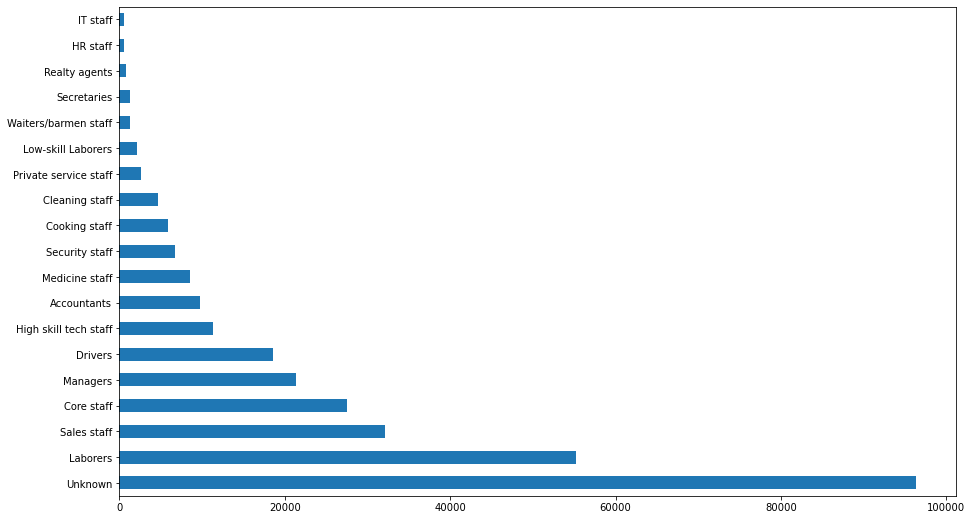

In [15]:
plt.figure(figsize = [15,9])
df1.OCCUPATION_TYPE.value_counts().plot.barh()
plt.show()

Check remaning colum with missing data

In [16]:
null_percent(df1,.1)

AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
dtype: float64

In [17]:
null_percent(df1,0.1).index

Index(['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'],
      dtype='object')

In [18]:
df1[null_percent(df1,0.1).index].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,306490.000000,306490.000000,306490.000000,306490.000000
mean,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974,1.422245,0.143421,1.405292,0.100049
std,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295,2.400989,0.446698,2.379803,0.362291
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,2.000000,0.000000
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000,348.000000,34.000000,344.000000,24.000000


Values in above column are in intigers and thus imputing them with mean will result in non intiger values thus replacing missing data with Median  

In [19]:
df1[null_percent(df1,0.1).index].median()

AMT_REQ_CREDIT_BUREAU_HOUR    0.0
AMT_REQ_CREDIT_BUREAU_DAY     0.0
AMT_REQ_CREDIT_BUREAU_WEEK    0.0
AMT_REQ_CREDIT_BUREAU_MON     0.0
AMT_REQ_CREDIT_BUREAU_QRT     0.0
AMT_REQ_CREDIT_BUREAU_YEAR    1.0
OBS_30_CNT_SOCIAL_CIRCLE      0.0
DEF_30_CNT_SOCIAL_CIRCLE      0.0
OBS_60_CNT_SOCIAL_CIRCLE      0.0
DEF_60_CNT_SOCIAL_CIRCLE      0.0
dtype: float64

In [20]:
df1.fillna(df1[null_percent(df1,0.1).index].median(),inplace=True) 

In [21]:
null_percent(df1).head(4)

AMT_GOODS_PRICE           0.090403
AMT_ANNUITY               0.003902
CNT_FAM_MEMBERS           0.000650
DAYS_LAST_PHONE_CHANGE    0.000325
dtype: float64

In [22]:
# Drop colum DAYS_LAST_PHONE_CHANGE   as its not relevent
df1.drop(labels='DAYS_LAST_PHONE_CHANGE',axis=1,inplace=True)

Since Missing Data is veyy less in terms of % value we can drop rows with Missing values 

In [23]:
null_percent(df1).head()

AMT_GOODS_PRICE             0.090403
AMT_ANNUITY                 0.003902
CNT_FAM_MEMBERS             0.000650
SK_ID_CURR                  0.000000
OBS_30_CNT_SOCIAL_CIRCLE    0.000000
dtype: float64

In [24]:
df1=df1[~df1['AMT_GOODS_PRICE'].isna()]
df1=df1[~df1['AMT_ANNUITY'].isna()]
df1=df1[~df1['CNT_FAM_MEMBERS'].isna()]

In [25]:
df1.isna().sum().sum()

0

All Missing Values are now delt with

### Standardising values

In [26]:
df1.describe() 

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307221.000000,307221.000000,307221.000000,3.072210e+05,3.072210e+05,307221.000000,3.072210e+05,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.00000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000
mean,278170.730087,0.080737,0.416977,1.688326e+05,5.993163e+05,27120.452357,5.383973e+05,0.020870,-16038.787130,63851.095221,-4986.328060,-2994.384228,2.152626,2.052454,2.031498,12.063020,0.015149,0.050758,0.040642,0.078155,0.230401,0.179503,1.417712,0.142956,1.400822,0.099716,0.00554,0.006061,0.029728,0.231403,0.229682,1.778694
std,102788.457585,0.272431,0.722047,2.372199e+05,4.025196e+05,14492.106811,3.694484e+05,0.013832,4363.852714,141305.918999,3523.139489,1509.381616,0.910623,0.509086,0.502789,3.265941,0.122144,0.219504,0.197459,0.268417,0.421090,0.383773,2.398593,0.446064,2.377435,0.361725,0.07803,0.103086,0.190760,0.857087,0.744251,1.765645
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189141.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16551.000000,2.385000e+05,0.010006,-19684.000000,-2760.000000,-7480.000000,-4299.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,278194.000000,0.000000,0.000000,1.485000e+05,5.146020e+05,24916.500000,4.500000e+05,0.018850,-15753.000000,-1213.000000,-4504.000000,-3255.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367126.000000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12415.000000,-289.000000,-2010.000000,-1720.000000,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,20.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,348.000000,34.000000,344.000000,24.000000,4.00000,9.000000,8.000000,27.000000,261.000000,25.000000


In [27]:
# Detecting Values in CODE_GENDER
df1.CODE_GENDER.value_counts()

F      202251
M      104966
XNA         4
Name: CODE_GENDER, dtype: int64

In [28]:
# Updating XNA with F as mode of col CODE_GENDER
df1['CODE_GENDER'][df1.CODE_GENDER=='XNA']='F'

-Convert Colums with -ve datys to +ve  ( DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH)<br>
-Then Convert days colum to  years  (DAYS_BIRTH , DAYS_EMPLOYED , YEARS EMPLOYED)  <br>
-Columns with Amount values are having very high values we can change them to baskets for better undunderstand (AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE ) 

In [29]:
# dealing with AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE  to update them into bins 

df1['AMT_INCOME_TOTAL']=df1['AMT_INCOME_TOTAL']/100000
bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slot = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

df1['AMT_INCOME_RANGE']=pd.cut(df1['AMT_INCOME_TOTAL'],bins,labels=slot)

In [30]:
df1['AMT_CREDIT']=df1['AMT_CREDIT']/100000
df1['AMT_GOODS_PRICE']=df1['AMT_GOODS_PRICE']/100000

df1['AMT_CREDIT_RANGE']=pd.cut(df1['AMT_CREDIT'],bins,labels=slot)
df1['AMT_GOODS_RANGE']=pd.cut(df1['AMT_GOODS_PRICE'],bins,labels=slot)

In [31]:
# Convert Colums with -ve datys to +ve ( DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH)

In [32]:
Col_days = ["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH"]

df1[Col_days]= abs(df1[Col_days])

In [33]:
df1[Col_days].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,307221.000000,307221.000000,307221.000000,307221.000000
mean,16038.787130,67760.549399,4986.328060,2994.384228
std,4363.852714,139473.407413,3523.139489,1509.381616
min,7489.000000,0.000000,0.000000,0.000000
25%,12415.000000,933.000000,2010.000000,1720.000000
50%,15753.000000,2219.000000,4504.000000,3255.000000
75%,19684.000000,5711.000000,7480.000000,4299.000000
max,25229.000000,365243.000000,24672.000000,7197.000000


In [34]:
# All Colums are +ve now
# now converting DAYS_BIRTH, DAYS_EMPLOYED into catogorical in years for better understanding by creating new columns

In [35]:
df1["AGE"] = df1["DAYS_BIRTH"]/365
bins = [0,20,25,30,35,40,45,50,55,60,150]
slots = ["0-20","20-25","25-30","30-35","35-40","40-45","45-50","50-55","55-60","60 Above"]

df1["AGE_GROUP"] = pd.cut(df1["AGE"], bins=bins, labels=slots)

In [36]:
df1["YEARS_EMPLOYED"] = df1["DAYS_EMPLOYED"]/365
bins = [0,5,10,15,20,25,30,60]
slots = ["0-5","5-10","10-15","15-20","20-25","25-30","30 Above"]

df1["EMPLOYEMENT_YEARS"] = pd.cut(df1["YEARS_EMPLOYED"], bins=bins, labels=slots)

In [37]:
df1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AMT_GOODS_RANGE,AGE,AGE_GROUP,YEARS_EMPLOYED,EMPLOYEMENT_YEARS
0,100002,1,Cash loans,M,0,2.025,4.065975,24700.5,3.510,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2L-3L,4L-5L,3L-4L,25.920548,25-30,1.745205,0-5
1,100003,0,Cash loans,F,0,2.700,12.935025,35698.5,11.295,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2L-3L,10L Above,10L Above,45.931507,45-50,3.254795,0-5
2,100004,0,Revolving loans,M,0,0.675,1.350000,6750.0,1.350,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0-1L,1L-2L,1L-2L,52.180822,50-55,0.616438,0-5
3,100006,0,Cash loans,F,0,1.350,3.126825,29686.5,2.970,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1L-2L,3L-4L,2L-3L,52.068493,50-55,8.326027,5-10
4,100007,0,Cash loans,M,0,1.215,5.130000,21865.5,5.130,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1L-2L,5L-6L,5L-6L,54.608219,50-55,8.323288,5-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,0,1.575,2.547000,27558.0,2.250,Working,Secondary / secondary special,Separated,With parents,0.032561,9327,236,8456.0,1982,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1L-2L,2L-3L,2L-3L,25.553425,25-30,0.646575,0-5
307507,456252,0,Cash loans,F,0,0.720,2.695500,12001.5,2.250,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,20775,365243,4388.0,4090,Unknown,1.0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0-1L,2L-3L,2L-3L,56.917808,55-60,1000.665753,NaN
307508,456253,0,Cash loans,F,0,1.530,6.776640,29979.0,5.850,Working,Higher education,Separated,House / apartment,0.005002,14966,7921,6737.0,5150,Managers,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,School,6.0,0.0,6.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1L-2L,6L-7L,5L-6L,41.002740,40-45,21.701370,20-25
307509,456254,1,Cash loans,F,0,1.710,3.701070,20205.0,3.195,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,11961,4786,2562.0,931,Laborers,2.0,2,2,WEDNESDAY,9,0,0,0,1,1,0,Business Entity Type 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1L-2L,3L-4L,3L-4L,32.769863,30-35,13.112329,10-15


##### ORGANIZATION_TYPE cleaning

In [38]:
df1["ORGANIZATION_TYPE"].replace(['Business Entity Type 1','Business Entity Type 2','Business Entity Type 3'],'Business',inplace=True)

In [39]:
df1["ORGANIZATION_TYPE"].replace(['Business Entity Type 1','Business Entity Type 2','Business Entity Type 3'],'Business',inplace=True)
df1["ORGANIZATION_TYPE"].replace(['Transport: type 1','Transport: type 3','Transport: type 2','Transport: type 4'],'Transport',inplace=True)
df1["ORGANIZATION_TYPE"].replace(['Trade: type 2','Trade: type 1','Trade: type 3','Trade: type 4','Trade: type 5','Trade: type 6','Trade: type 7'],'Trade',inplace=True)

In [40]:
aa=['Industry: type 9',
 'Industry: type 3',
 'Industry: type 2',
 'Industry: type 12',
 'Industry: type 10',
 'Industry: type 6',
 'Industry: type 1',
 'Industry: type 5',
 'Industry: type 13',
 'Industry: type 8',
 'Industry: type 7',
 'Industry: type 4',
 'Industry: type 11']
df1["ORGANIZATION_TYPE"].replace(aa,'Industry',inplace=True)
df1["ORGANIZATION_TYPE"].replace('XNA','Other',inplace=True)    

In [41]:
df2["NAME_CASH_LOAN_PURPOSE"].replace(['XAP','XNA','Other'],'Others',inplace=True)

### Detecting Outliers

In [42]:
df1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED
count,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.00000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000
mean,278170.730087,0.080737,0.416977,1.688326,5.993163,27120.452357,5.383973,0.020870,16038.787130,67760.549399,4986.328060,2994.384228,2.152626,2.052454,2.031498,12.063020,0.015149,0.050758,0.040642,0.078155,0.230401,0.179503,1.417712,0.142956,1.400822,0.099716,0.00554,0.006061,0.029728,0.231403,0.229682,1.778694,43.941883,185.645341
std,102788.457585,0.272431,0.722047,2.372199,4.025196,14492.106811,3.694484,0.013832,4363.852714,139473.407413,3523.139489,1509.381616,0.910623,0.509086,0.502789,3.265941,0.122144,0.219504,0.197459,0.268417,0.421090,0.383773,2.398593,0.446064,2.377435,0.361725,0.07803,0.103086,0.190760,0.857087,0.744251,1.765645,11.955761,382.118924
min,100002.000000,0.000000,0.000000,0.256500,0.450000,1615.500000,0.405000,0.000290,7489.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,20.517808,0.000000
25%,189141.000000,0.000000,0.000000,1.125000,2.700000,16551.000000,2.385000,0.010006,12415.000000,933.000000,2010.000000,1720.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,34.013699,2.556164
50%,278194.000000,0.000000,0.000000,1.485000,5.146020,24916.500000,4.500000,0.018850,15753.000000,2219.000000,4504.000000,3255.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,43.158904,6.079452
75%,367126.000000,0.000000,1.000000,2.025000,8.086500,34596.000000,6.795000,0.028663,19684.000000,5711.000000,7480.000000,4299.000000,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.000000,53.928767,15.646575
max,456255.000000,1.000000,19.000000,1170.000000,40.500000,258025.500000,40.500000,0.072508,25229.000000,365243.000000,24672.000000,7197.000000,20.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,348.000000,34.000000,344.000000,24.000000,4.00000,9.000000,8.000000,27.000000,261.000000,25.000000,69.120548,1000.665753


from above Data  we could find all the columns those wo have high difference between max and 75 percentile and the ones which makes no sense having max value to be so high are captured below:

In [43]:
col_outlier = ["CNT_CHILDREN","AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE",
               "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION",
              ]

In [44]:
len(col_outlier)

8

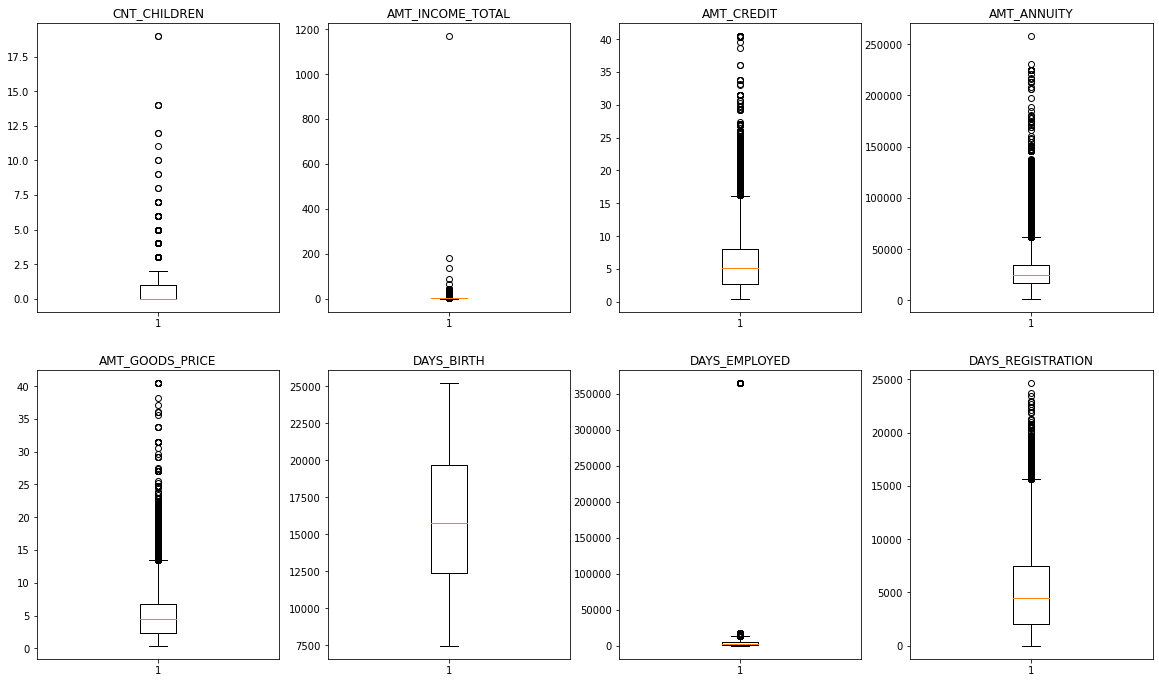

In [45]:
import itertools # using itertools for efficient looping plotting subplots

# Plotting box plot to view outliers

plt.figure(figsize=[20,50])

for i,j in itertools.zip_longest(col_outlier, range(len(col_outlier))):
    plt.subplot(8,4,j+1)
    
    plt.boxplot(df1[i])
    plt.title(i)

--DAYS_BIRTH has no outliers and data is good <br>
--DAYS_EMPLOYED has outlier which value 365243 is beyond any acceptable range and is incorrect<br>
--AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE,CNT_CHILDREN have some number of outliers.<br>
--AMT_INCOME_TOTAL has huge varince number of outliers which indicate that few of the loan applicants have high income when compared to the others.

## Data 2 previous_application

In [46]:
print(df2.shape)
df2.head()

(1670214, 37)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,Others,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,Others,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,Others,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,Others,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
null_percent(df2)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [48]:
# dropping col with more than 50% data missing 

to_drop = null_percent(df2,50).index
df2.drop(labels=to_drop, axis=1,inplace=True)

In [49]:
# Dropping Unnecessary col
Unnecessary_col = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']
df2.drop(labels=Unnecessary_col, axis=1,inplace=True)

In [50]:
df2.shape

(1670214, 29)

In [51]:
# IMputing  "Unknown" values as this a categorical column
df2["NAME_TYPE_SUITE"] = df2["NAME_TYPE_SUITE"].fillna("Unknown")

In [52]:
null_percent(df2,1)

DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
AMT_GOODS_PRICE              23.081773
AMT_ANNUITY                  22.286665
CNT_PAYMENT                  22.286366
dtype: float64

There are missing values in columns 'DAYS_FIRST_DUE', 'DAYS_TERMINATION', 'DAYS_FIRST_DRAWING','DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE' and these columns count days thus will keeping null values as they are

In [53]:
df2[null_percent(df2,1).index].describe()

,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT
count,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,1.284699e+06,1.297979e+06,1.297984e+06
mean,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570,2.278473e+05,1.595512e+04,1.605408e+01
std,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134,3.153966e+05,1.478214e+04,1.456729e+01
min,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000,5.084100e+04,6.321780e+03,6.000000e+00
50%,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000,1.123200e+05,1.125000e+04,1.200000e+01
75%,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000,2.340000e+05,2.065842e+04,2.400000e+01
max,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000,6.905160e+06,4.180581e+05,8.400000e+01


In [54]:
# Convert _ve days to +ve
# create varible for -ve col 'p_days' 
p_days = ['DAYS_DECISION','DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']

df2[p_days] = abs(df2[p_days])

In [55]:
df2[p_days].describe()

,DAYS_DECISION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
count,1.670214e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,8.806797e+02,342340.056543,15949.224065,35163.363265,78152.730207,83505.775017
std,7.790997e+02,88413.495220,72007.270877,106405.950190,148833.342466,152484.418802
min,1.000000e+00,2.000000,2.000000,0.000000,2.000000,2.000000
25%,2.800000e+02,365243.000000,475.000000,257.000000,455.000000,447.000000
50%,5.810000e+02,365243.000000,921.000000,741.000000,1155.000000,1171.000000
75%,1.300000e+03,365243.000000,1825.000000,1735.000000,2418.000000,2501.000000
max,2.922000e+03,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000


In [56]:
# Converting Continous Days into catagorical colums by binning

bins = [0,1*365,2*365,3*365,4*365,5*365,6*365,7*365,10*365]
slots = ["1","2","3","4","5","6","7","7 above"]

df2['YEARLY_DECISION'] = pd.cut(df2['DAYS_DECISION'],bins,labels=slots)

df2['YEARLY_DECISION'].value_counts(normalize=True)*100

1          34.351287
2          23.056806
3          12.855598
4           7.883181
5           6.128556
7           5.813806
7 above     5.060729
6           4.850037
Name: YEARLY_DECISION, dtype: float64

Wc can see around 34% people are for fresh loan with Desition wittin 1 year

In [57]:
null_percent(df2,1)

DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
AMT_GOODS_PRICE              23.081773
AMT_ANNUITY                  22.286665
CNT_PAYMENT                  22.286366
dtype: float64

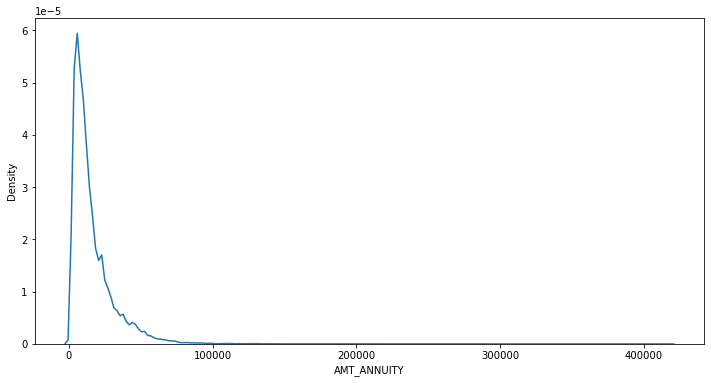

In [58]:
#  for AMT_ANNUITY plotting kde to understand the distribution

plt.figure(figsize=(12,6))
sns.kdeplot(df2['AMT_ANNUITY'])
plt.show()

There is a single peak at the left side of the distribution and it indicates the presence of outliers and hence imputing with mean would not be the right approach and hence imputing with median.

In [59]:
#imputing missing values with median 
df2['AMT_ANNUITY'].fillna(df2['AMT_ANNUITY'].median(),inplace = True)

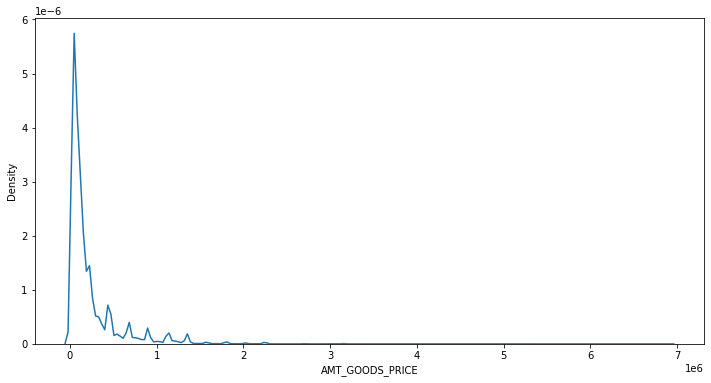

In [60]:
# Plotting kde plot for "AMT_GOODS_PRICE" to understand the distribution

plt.figure(figsize=(12,6))
sns.kdeplot(df2['AMT_GOODS_PRICE'])
plt.show()

In [61]:
# The original distribution has multiple peaks and also has outliers so updating AMT_GOODS_PRICE with mode
# Imputing null values with mode
df2['AMT_GOODS_PRICE'].fillna(df2['AMT_GOODS_PRICE'].mode()[0], inplace=True)

In [62]:
df2[df2['CNT_PAYMENT'].isna()]['NAME_CONTRACT_STATUS'].value_counts()

Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

Imputing CNT_PAYMENT with 0 as the NAME_CONTRACT_STATUS for these indicate that most of these loans were not started:

In [63]:
df2['CNT_PAYMENT'].fillna(0,inplace = True)

## Finding outliers

In [64]:
df2.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670213e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.490651e+04,1.752339e+05,1.961140e+05,1.856429e+05,8.806797e+02,3.139511e+02,1.247621e+01,342340.056543,15949.224065,35163.363265,78152.730207,83505.775017,0.332570
std,5.325980e+05,1.028148e+05,1.317751e+04,2.927798e+05,3.185746e+05,2.871413e+05,7.790997e+02,7.127443e+03,1.447588e+01,88413.495220,72007.270877,106405.950190,148833.342466,152484.418802,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,1.461857e+06,1.893290e+05,7.547096e+03,1.872000e+04,2.416050e+04,4.500000e+04,2.800000e+02,-1.000000e+00,0.000000e+00,365243.000000,475.000000,257.000000,455.000000,447.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,7.105050e+04,5.810000e+02,3.000000e+00,1.000000e+01,365243.000000,921.000000,741.000000,1155.000000,1171.000000,0.000000
75%,2.384280e+06,3.675140e+05,1.682403e+04,1.803600e+05,2.164185e+05,1.804050e+05,1.300000e+03,8.200000e+01,1.600000e+01,365243.000000,1825.000000,1735.000000,2418.000000,2501.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,2.922000e+03,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


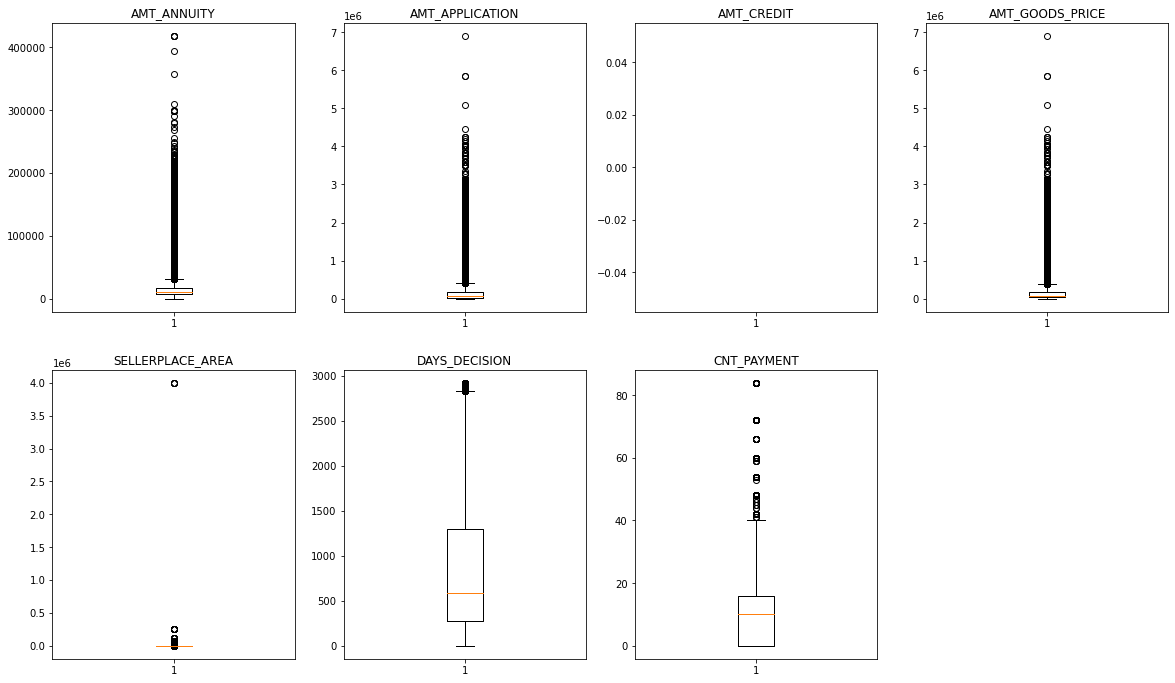

In [65]:
p_outlier_col = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE',
                 'SELLERPLACE_AREA','DAYS_DECISION','CNT_PAYMENT']
plt.figure(figsize=[20,50])

for i,j in itertools.zip_longest(p_outlier_col, range(len(p_outlier_col))):
    plt.subplot(8,4,j+1)
    
    plt.boxplot(df2[i])
    plt.title(i)

It can be seen that in previous application data

AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA have huge number of outliers. <br>
CNT_PAYMENT has few outlier values.<br>
DAYS_DECISION has little number of outliers indicating that these previous applications decisions were taken long back.

## 6. Data Analysis Time

Strategy:
The data analysis flow has been planned in following way :

* Imbalance in Data
* Categorical Data Analysis
* Categorical segmented Univariate Analysis
* Categorical Bi/Multivariate analysis
* Numeric Data Analysis
* Bi-furcation of databased based on TARGET data
* Correlation Matrix
* Numerical segmented Univariate Analysis
* Numerical Bi/Multivariate analysis

### Imbalance in Data

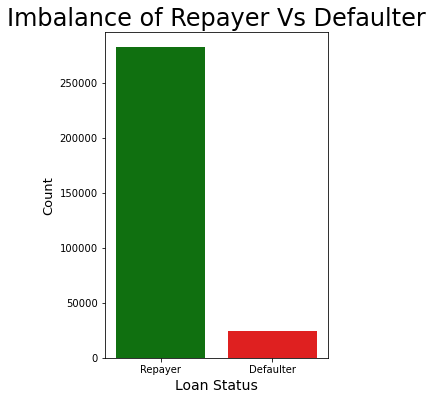

In [66]:
plt.figure(figsize= [4,6])
sns.barplot(x=["Repayer","Defaulter"], y = df1["TARGET"].value_counts(), palette = ["green","r"])
plt.xlabel("Loan Status",fontdict = {"fontsize":14})
plt.ylabel("Count",fontdict = {"fontsize":13})
plt.title("Imbalance of Repayer Vs Defaulter", fontdict = {"fontsize":24})
plt.show()



In [67]:
status = round(df1['TARGET'].value_counts(normalize=True)*100,1)
print("Repayer Percentage =" ,status[0])
print("Defaulter Percentage =" ,status[1])

print("Imbalance Ratio with respect to Repayer and Defaulter is given: ",round(status[0]/status[1],2),'/1')

Repayer Percentage = 91.9
Defaulter Percentage = 8.1
Imbalance Ratio with respect to Repayer and Defaulter is given:  11.35 /1


In [68]:
df1['TARGET']=df1['TARGET'].apply(lambda x : 'Repayer' if x==0 else 'Defaulter')

In [69]:
# Creating a function "uniplot" to perform Univatite analysiv wrt Target# Count plotting in logarithmic scale
# Count plotting in logarithmic scale

def Univatite(data,col,title,hue =None,log=False):

    
    tem = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(data[col].unique()) + 6 + 4*len(tem.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    
    if log==True:
        plt.yscale("log")
    
    ax = sns.countplot(data = data, x= col, order=data[col].value_counts().index,hue = hue,palette='magma') 
    plt.title(title)    
    plt.show()
# Plot to get default ratio 
def defaulter (col):
    (df1[df1['TARGET']=='Defaulter'][col].value_counts()/df1[col].value_counts()).sort_values(ascending=False).plot.bar()

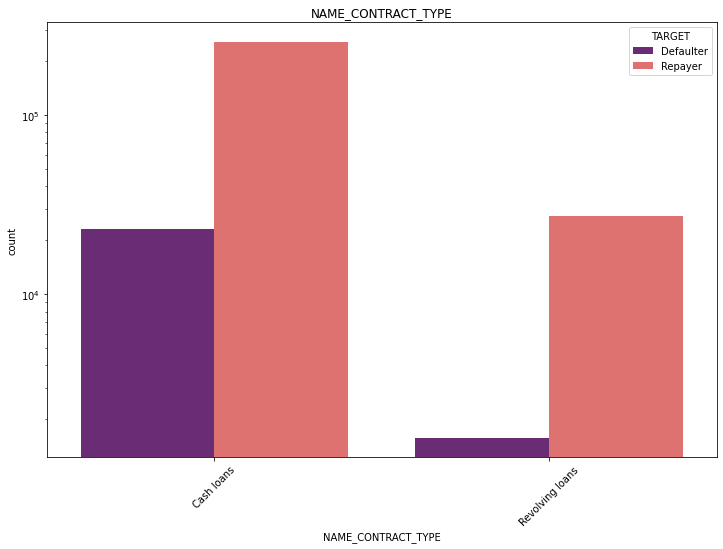

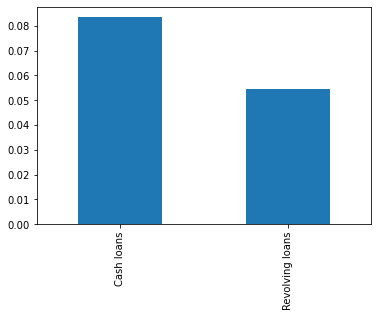

In [70]:
Univatite(df1,col='NAME_CONTRACT_TYPE',title='NAME_CONTRACT_TYPE',hue='TARGET',log=True)
defaulter ('NAME_CONTRACT_TYPE')


Points to be concluded from the above graph.

For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.<br>

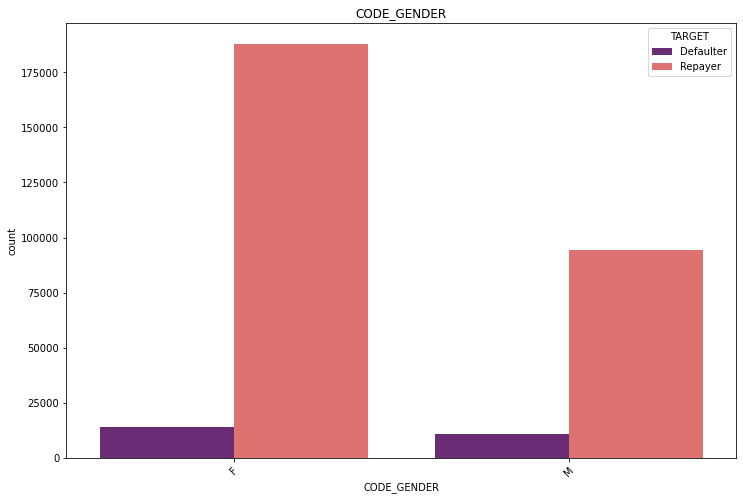

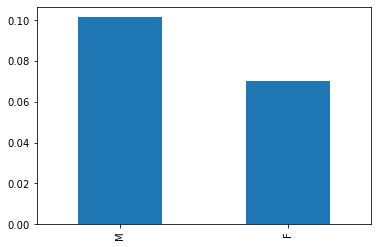

In [71]:
Univatite(df1,col='CODE_GENDER',title='CODE_GENDER',hue='TARGET')
defaulter('CODE_GENDER')

The number of female clients is almost double the number of male clients.

Based on the proportion of defaulted credits, males have a higher chance of Default  , comparing with women 

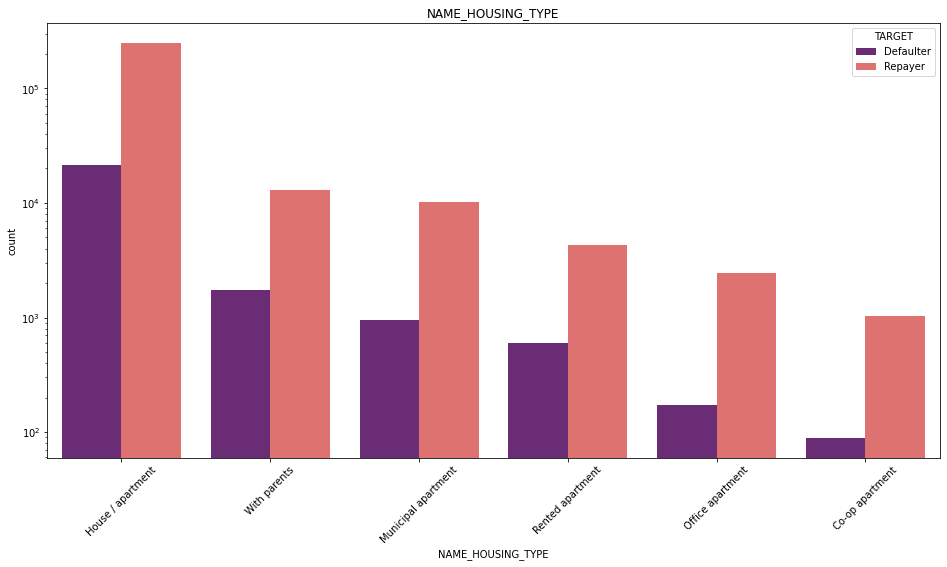

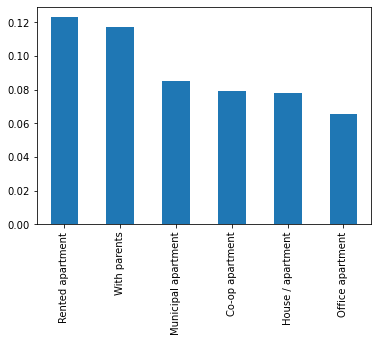

In [72]:
Univatite(df1,col='NAME_HOUSING_TYPE',title='NAME_HOUSING_TYPE',hue='TARGET',log=True)
defaulter('NAME_HOUSING_TYPE')

Majority of people live in House/apartment <br>
People living in office apartments have lowest default rate<br>
People living with parents (~11.5%) and living in rented apartments(>12%) have higher probability of defaulting

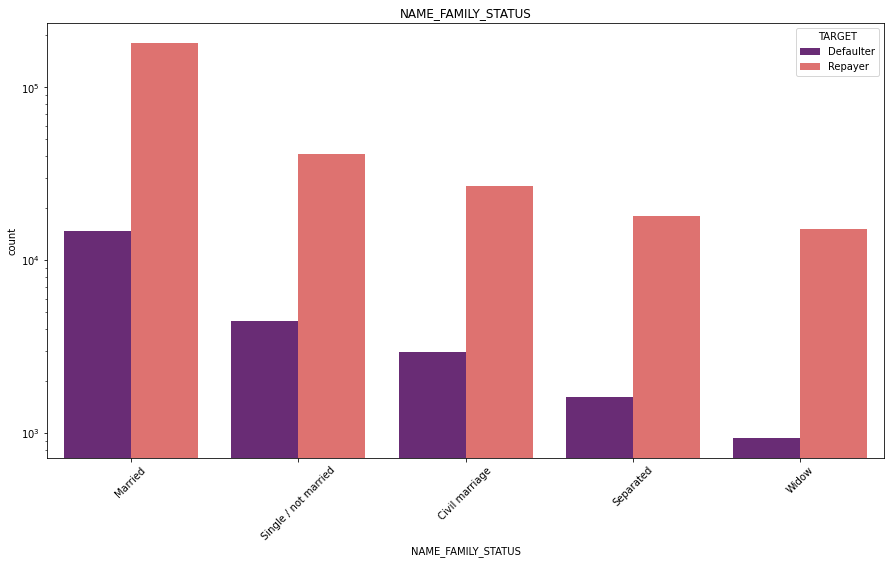

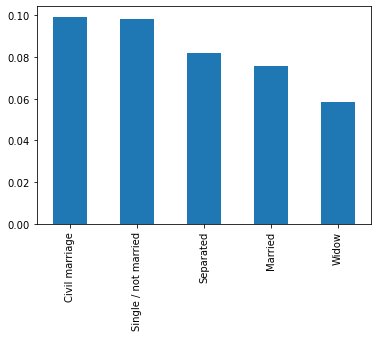

In [73]:
# Analyzing Family status based on loan repayment status

Univatite(df1,col='NAME_FAMILY_STATUS',title='NAME_FAMILY_STATUS',hue='TARGET',log=True)
defaulter('NAME_FAMILY_STATUS')

Most of the people who have taken loan are married, followed by Single/not married and civil marriage <br>
In Percentage of defaulters are highest among in  Civil marriage and single percent around (10%) and widow has the lowest around 6%.

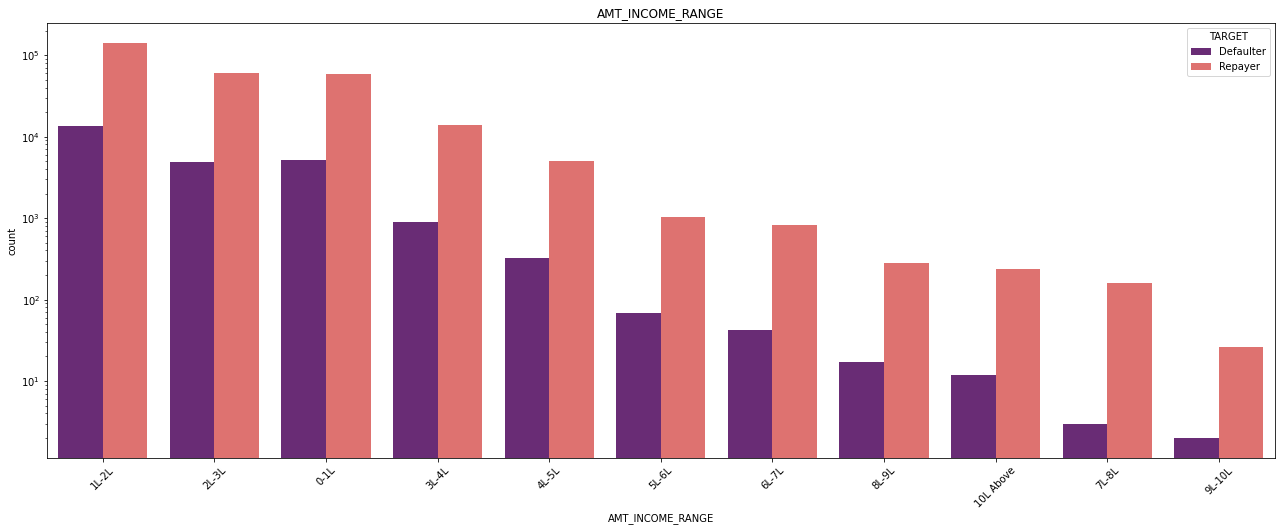

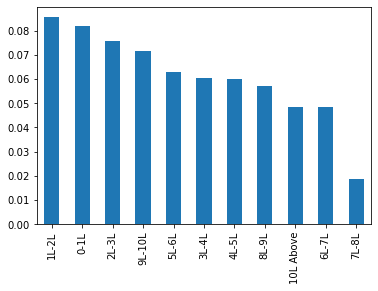

In [74]:
Univatite(df1,col='AMT_INCOME_RANGE',title='AMT_INCOME_RANGE',hue='TARGET',log=True)
defaulter('AMT_INCOME_RANGE')

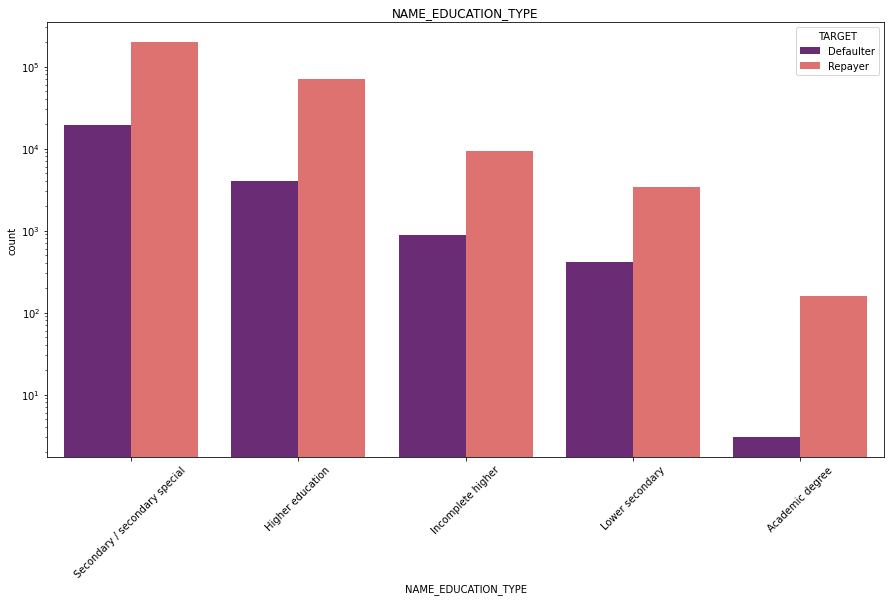

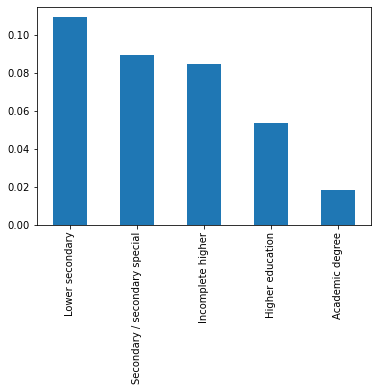

In [75]:
Univatite(df1,col='NAME_EDUCATION_TYPE',title='NAME_EDUCATION_TYPE',hue='TARGET',log=True)
defaulter('NAME_EDUCATION_TYPE')

Major Clients are at least secondary educated <br>
Very small Gropu are Having Academic Degree<br>
Major Client who Defaulter are having lower Secondary Educated arounf 11% <br>
And Client Academic Degree are least among defaulter

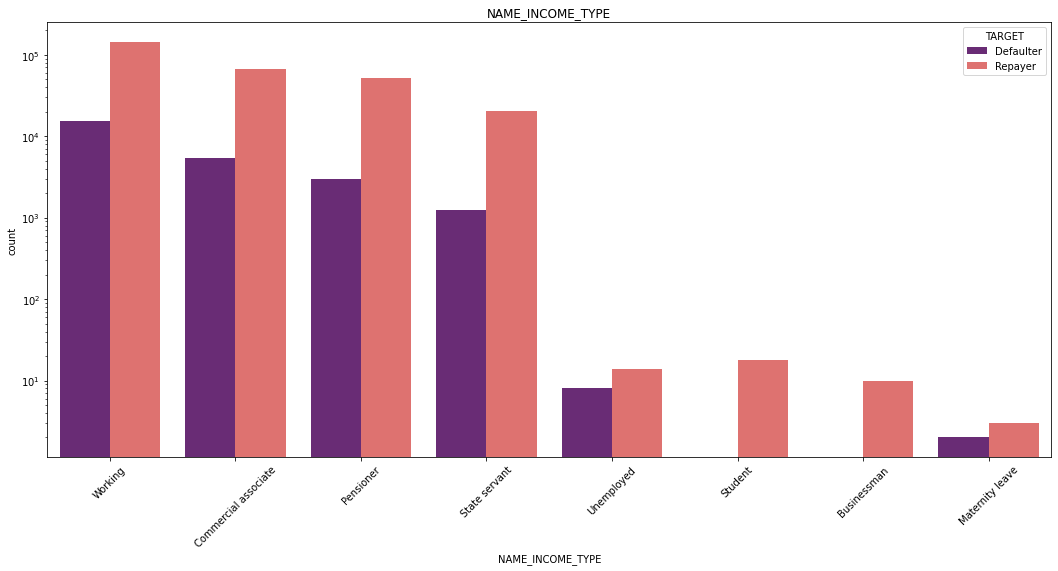

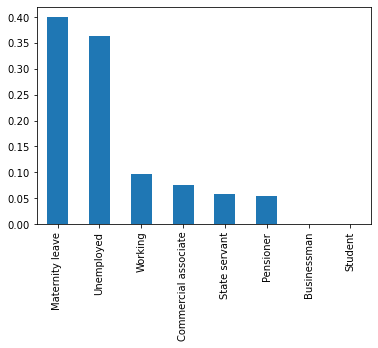

In [76]:
Univatite(df1,col='NAME_INCOME_TYPE',title='NAME_INCOME_TYPE',hue='TARGET',log=True)
defaulter('NAME_INCOME_TYPE')

Most of Clints are from  income type is Working, then followed by Commercial associate, Pensioner and State servant. <br>
The applicants who are on Maternity leave have defaulting percentage of 40% which is the highest, followed by Unemployed (37%). The rest under average around 10% defaultees.<br>
Even tough Student and Businessmen though less in numbers , the are still safest among the clients witm minimum Defaulter.

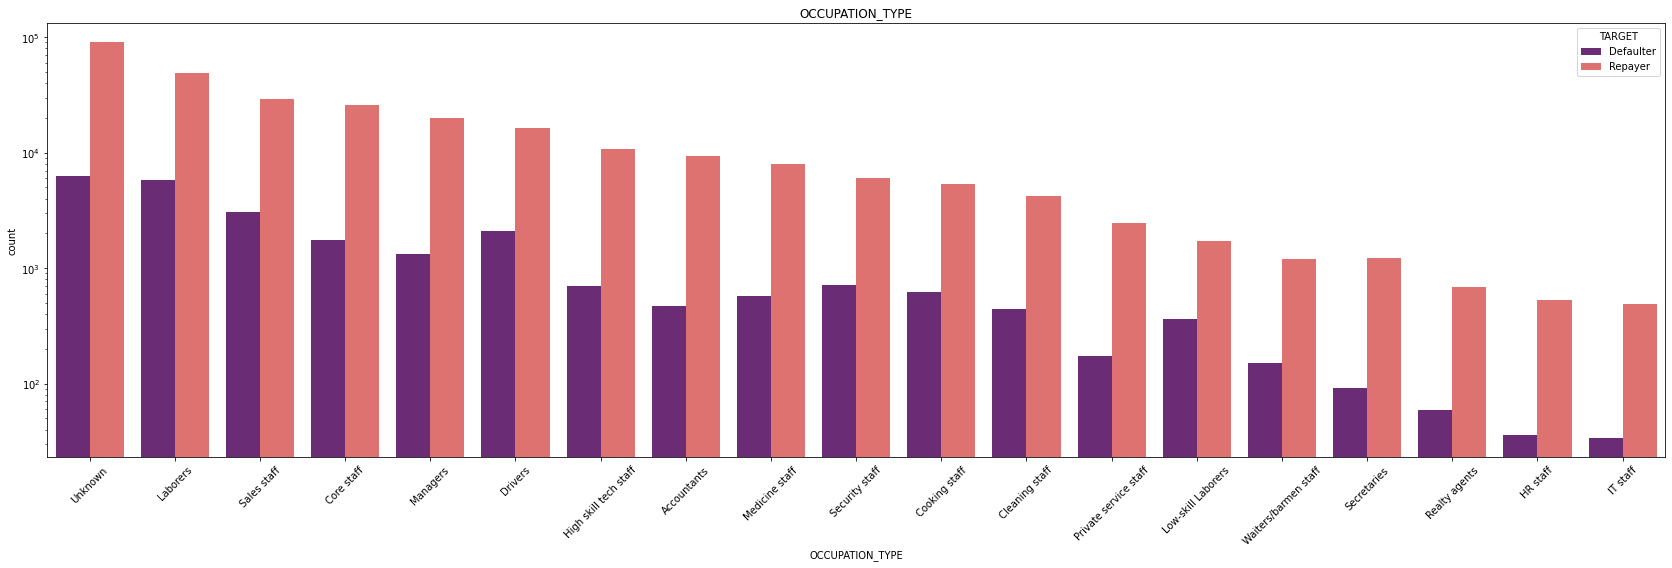

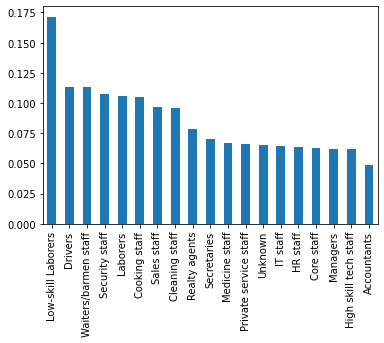

In [77]:
Univatite(df1,col='OCCUPATION_TYPE',title='OCCUPATION_TYPE',hue='TARGET',log=True)
defaulter('OCCUPATION_TYPE')

Most of the Clints are Laborers, followed by Sales and core staff. <br>
IT and HR are  less likely to apply for Loan.<br>
Category with highest percent of defautess are Low-skill Laborers (above 17%), followed by Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff

<Figure size 720x1080 with 0 Axes>

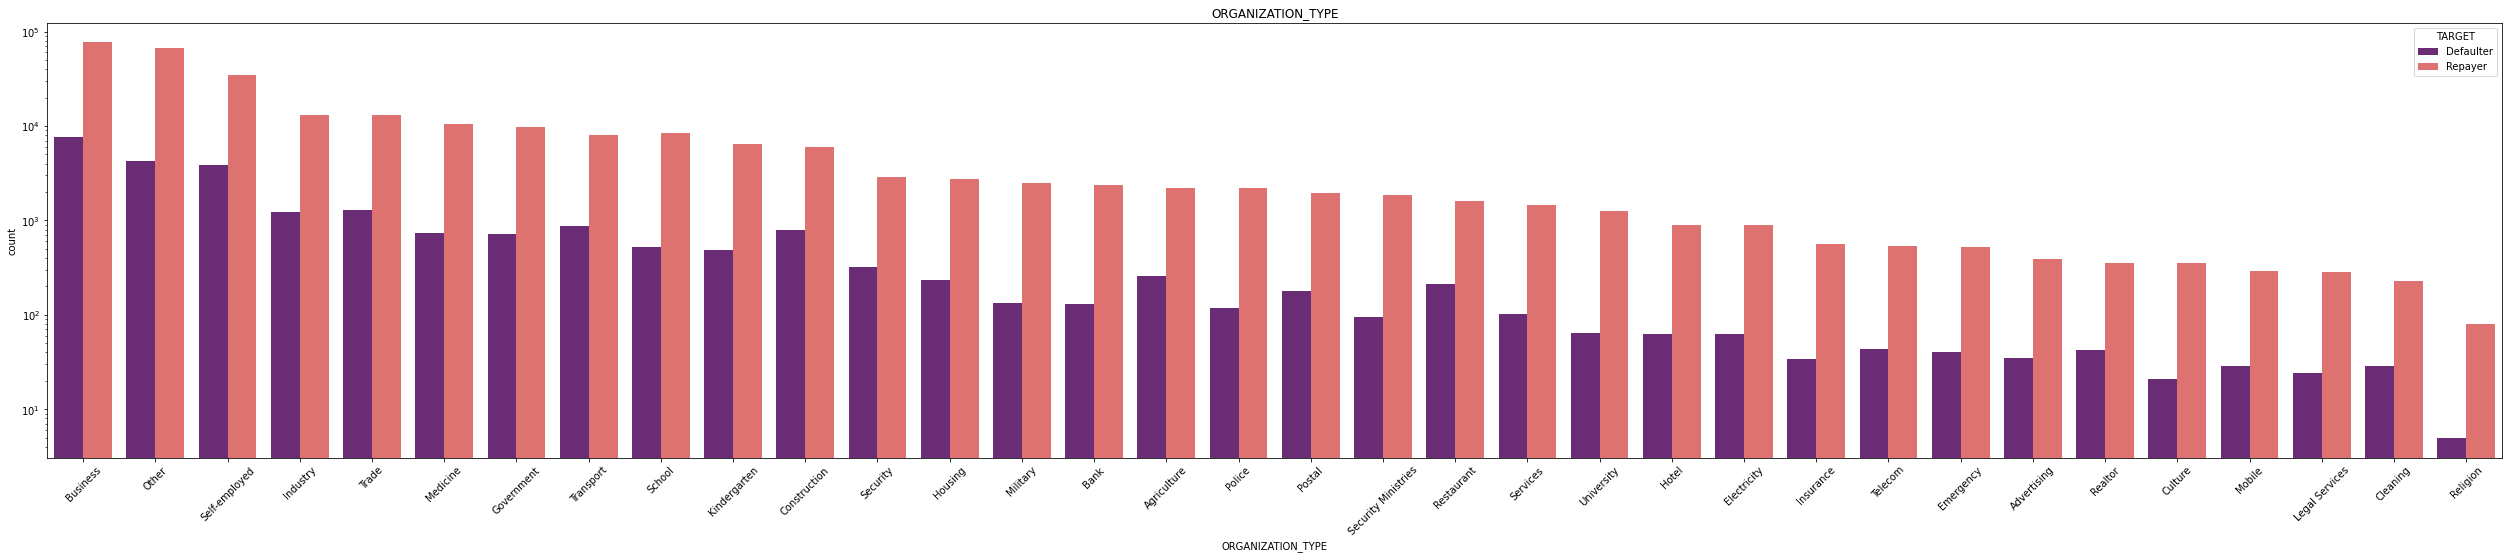

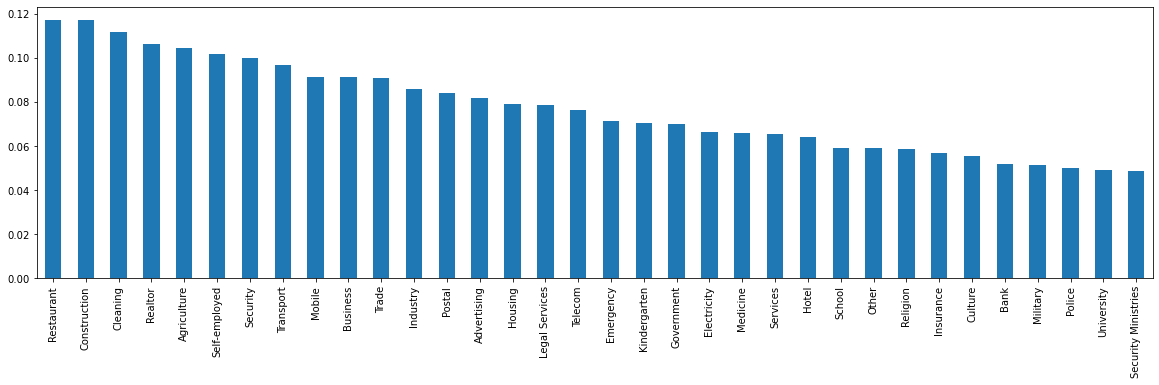

In [78]:
plt.figure(figsize=[10,15])
Univatite(df1,col='ORGANIZATION_TYPE',title='ORGANIZATION_TYPE',hue='TARGET',log=True)
plt.figure(figsize=[20,5])
defaulter('ORGANIZATION_TYPE')

Organizations with highest percent of defaultess are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%). <br>
Self employed people have relative high defaulting rate,to be safer side loan disbursement should be avoided or provide loan with higher interest rate to mitigate the risk of defaulting.<br>
Most of the people application for loan are from Business Entity Type 3<br>
For a very high number of applications, Organization type information is unavailable(XNA)<br>
It can be seen that following category of organization type has lesser defaulters thus safer for providing loans: Trade Type 4 and 5, Industry type 8

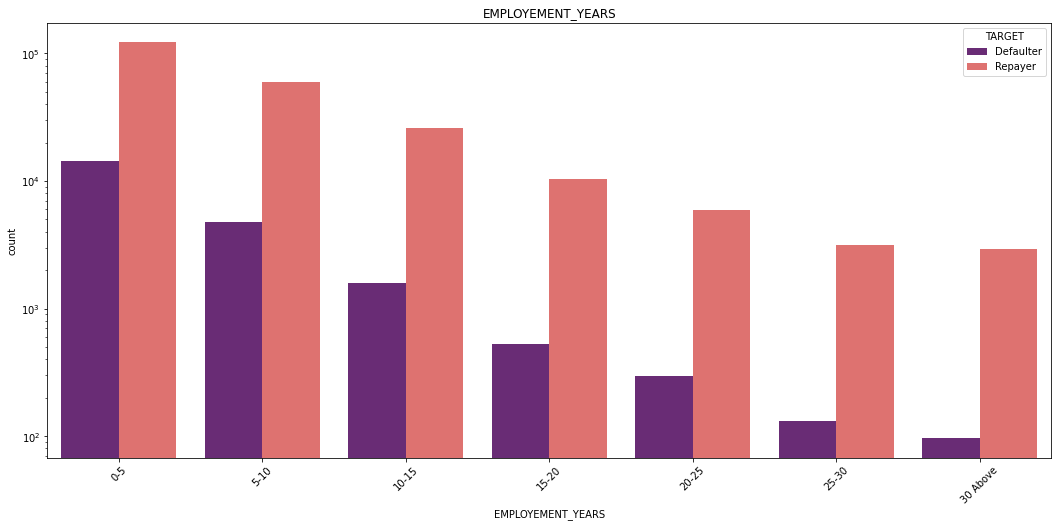

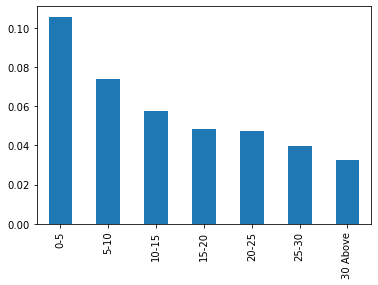

In [79]:
Univatite(df1,col='EMPLOYEMENT_YEARS',title='EMPLOYEMENT_YEARS',hue='TARGET',log=True)
defaulter('EMPLOYEMENT_YEARS')

There is Proportion or Applicant and default rate , Here we can see as experienced increse Loan application reduces and default rate also reduced

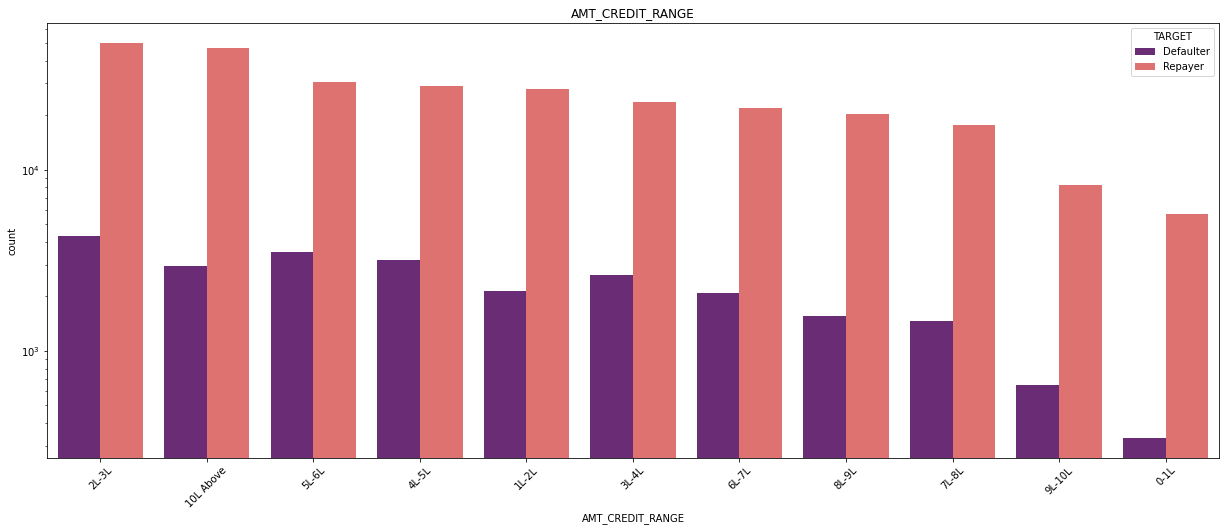

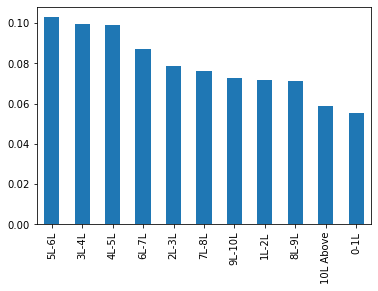

In [80]:
Univatite(df1,col='AMT_CREDIT_RANGE',title='AMT_CREDIT_RANGE',hue='TARGET',log=True)
defaulter('AMT_CREDIT_RANGE')

There is no particular Pattern here but laon size of 5-6l are having high default 

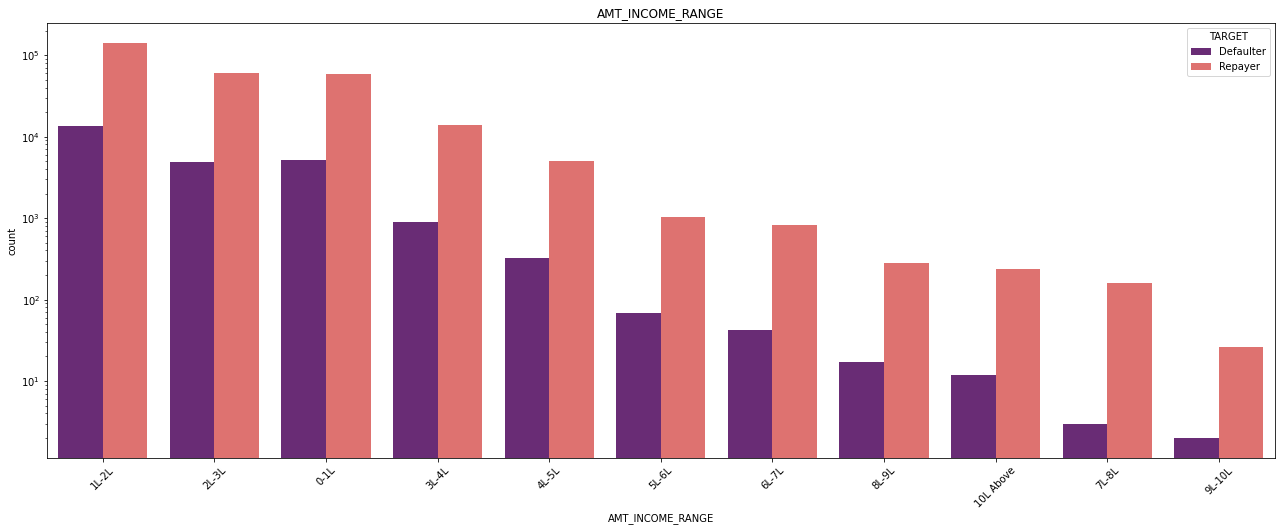

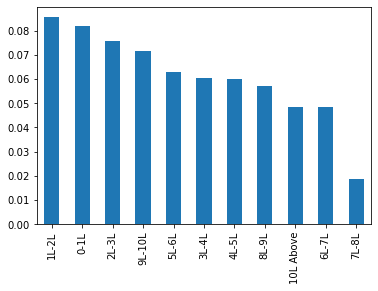

In [81]:
Univatite(df1,col='AMT_INCOME_RANGE',title='AMT_INCOME_RANGE',hue='TARGET',log=True)
defaulter('AMT_INCOME_RANGE')

There is slight pattern of higher application among lower income , higher the income applications are reduced<br>
And default has no pattern but high Amount of income class has lower default rate

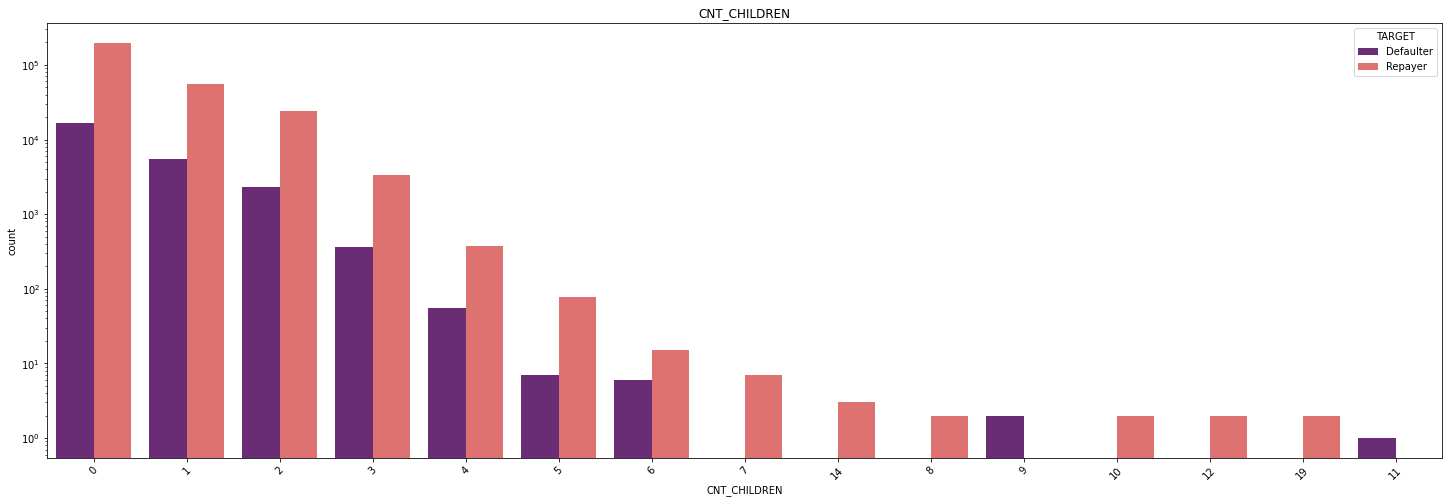

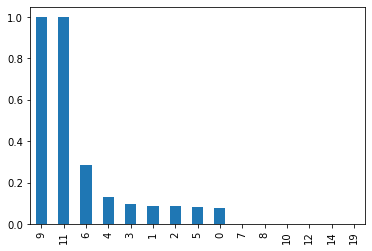

In [82]:
Univatite(df1,col='CNT_CHILDREN',title='CNT_CHILDREN',hue='TARGET',log=True)
defaulter('CNT_CHILDREN')

Majority  of the clients do not have children <br>
Very few clients have more than 3 children.<br>
Client who have more than 4 children has a very high default rate

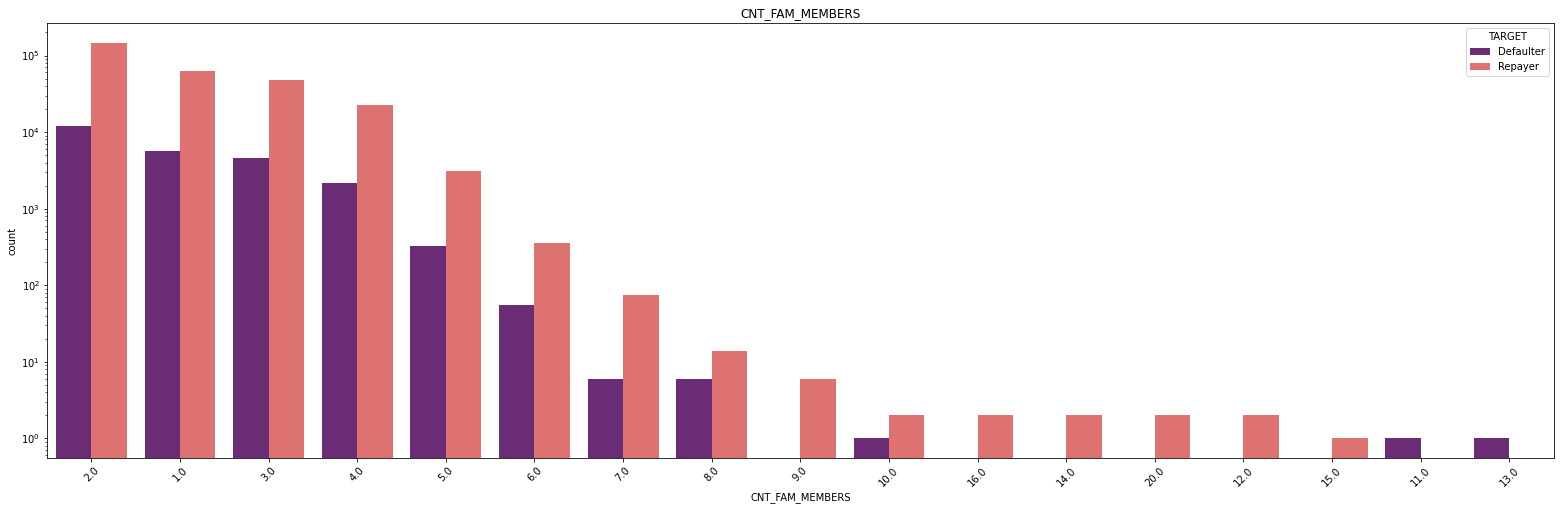

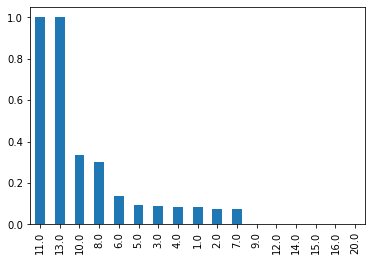

In [83]:
Univatite(df1,col='CNT_FAM_MEMBERS',title='CNT_FAM_MEMBERS',hue='TARGET',log=True)
defaulter('CNT_FAM_MEMBERS')

Family member follows the same trend as children where having more family members increases the risk of defaulting

In [84]:
df1.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

,count,mean,std,min,25%,50%,75%,max
NAME_INCOME_TYPE,,,,,,,,
Businessman,10.0,6.525000,6.272260,1.8000,2.250,4.9500,8.43750,22.5000
Commercial associate,71567.0,2.029858,1.479978,0.2655,1.350,1.8000,2.25000,180.0009
Maternity leave,5.0,1.404000,1.268569,0.4950,0.675,0.9000,1.35000,3.6000
Pensioner,55339.0,1.364155,0.766602,0.2565,0.900,1.1700,1.66500,22.5000
State servant,21677.0,1.797950,1.009074,0.2700,1.125,1.5750,2.25000,31.5000
Student,18.0,1.705000,1.066447,0.8100,1.125,1.5750,1.78875,5.6250
Unemployed,22.0,1.105364,0.880551,0.2655,0.540,0.7875,1.35000,3.3750
Working,158583.0,1.632116,3.077488,0.2565,1.125,1.3500,2.02500,1170.0000


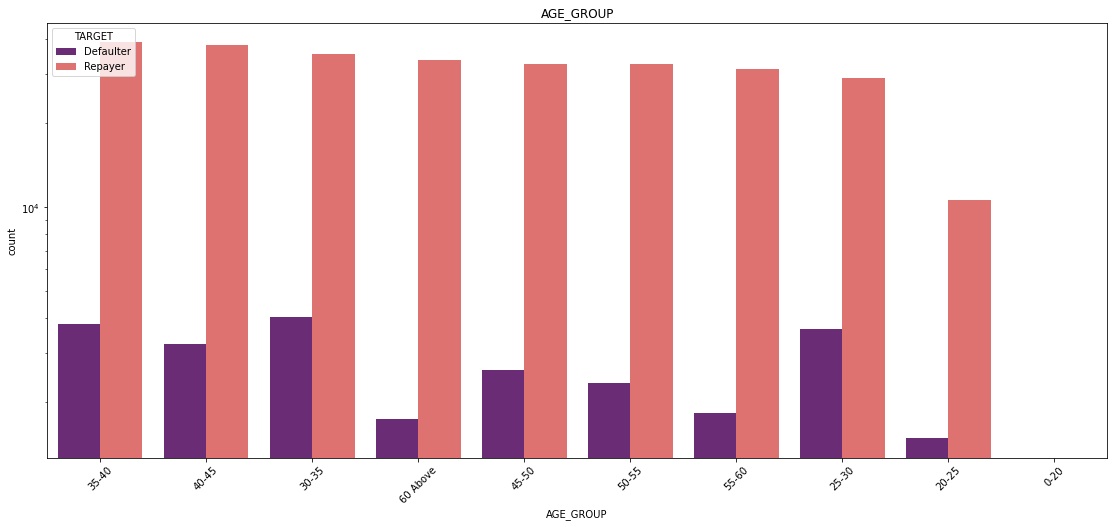

<AxesSubplot:xlabel='AGE_GROUP', ylabel='Count'>

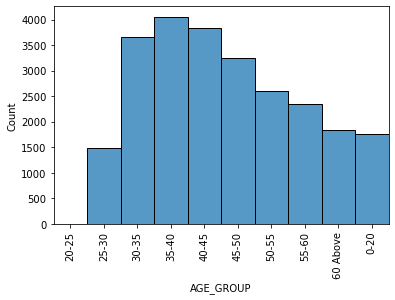

In [85]:
Univatite(df1,col='AGE_GROUP',title='AGE_GROUP',hue='TARGET',log=True)
defaulter('AGE_GROUP')
sns.histplot(df1.AGE_GROUP[df1.TARGET=='Defaulter'])

### Bivariate or Multivariate Analysis

In [86]:
# function for plotting repetitive barplots in bivariate categorical analysis

def bivar_cat(x_axis,y_axis,data,hue,figsize):
    
    plt.figure(figsize=figsize)
    sns.barplot(x=x_axis,y=y_axis,data=data, hue=hue)     
        
    # Defining aesthetics of Labels and Title of the plot using style dictionaries
    plt.ylabel(y_axis,fontsize = 16)
    plt.xlabel(x_axis,fontsize = 16)    
    plt.title(col,fontsize = 21) 
    plt.xticks(rotation=46, ha='right')
    plt.show()
    

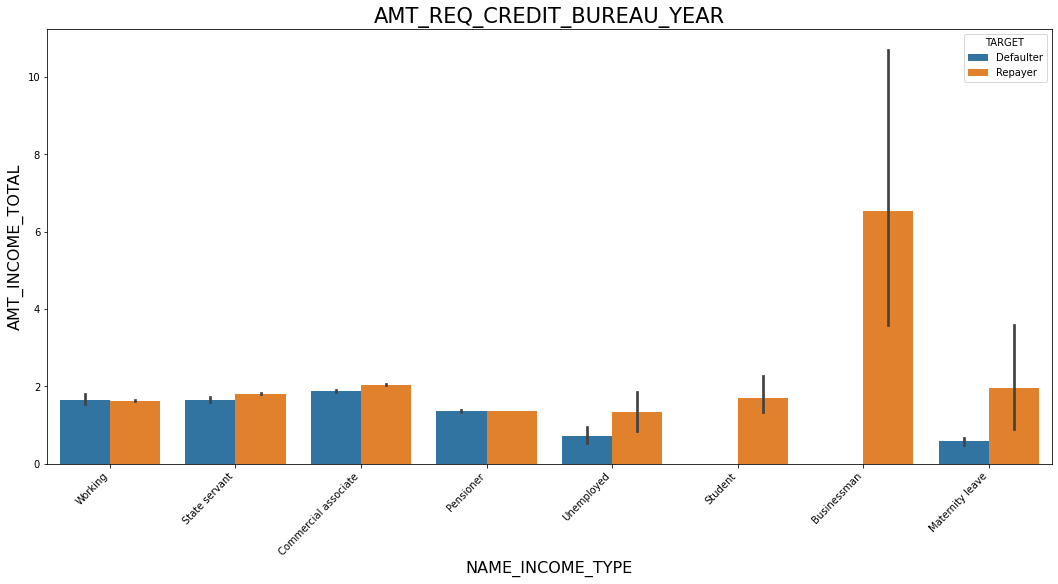

In [87]:
# Income type vs Income Amount Range on a Seaborn Barplot
bivar_cat("NAME_INCOME_TYPE","AMT_INCOME_TOTAL",df1,"TARGET",(18,8))

Businessmen Income is hoghest among all and also has high range and varition of 4-10lacks

###  Numeric Variables Analysis

In [88]:
# Creating list for Corr analysis
corr_col =['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']


In [89]:
# bisecting the  based on Target value  for correlation and other analysis

# Repayers dataframe
df1_repayer = df1.loc[df1['TARGET']=='Repayer', corr_col]

# Defaulters dataframe
df1_defaulter  = df1.loc[df1['TARGET']=='Defaulter', corr_col]

#### Correlation between numeric variable

In [95]:
# Getting  top 10 correlation for the Repayers dataframe


df1_repayer_corr=df1_repayer.corr().where(np.triu(np.ones(df1_repayer.corr().shape),k=1).astype(np.bool)).unstack().reset_index()
df1_repayer_corr.columns =['VAR1','VAR2','Corr']
df1_repayer_corr.dropna(subset = ["Corr"], inplace = True)
df1_repayer_corr['Corr']=df1_repayer_corr['Corr'].abs()
df1_repayer_corr.sort_values(by='Corr',ascending=False).head(10)


,VAR1,VAR2,Corr
114,AMT_GOODS_PRICE,AMT_CREDIT,0.987251
347,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950124
280,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878567
463,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.861719
550,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.830377
115,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686
86,AMT_ANNUITY,AMT_CREDIT,0.771114
202,DAYS_EMPLOYED,DAYS_BIRTH,0.626147
313,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,0.539067
341,REGION_RATING_CLIENT_W_CITY,REGION_POPULATION_RELATIVE,0.537353


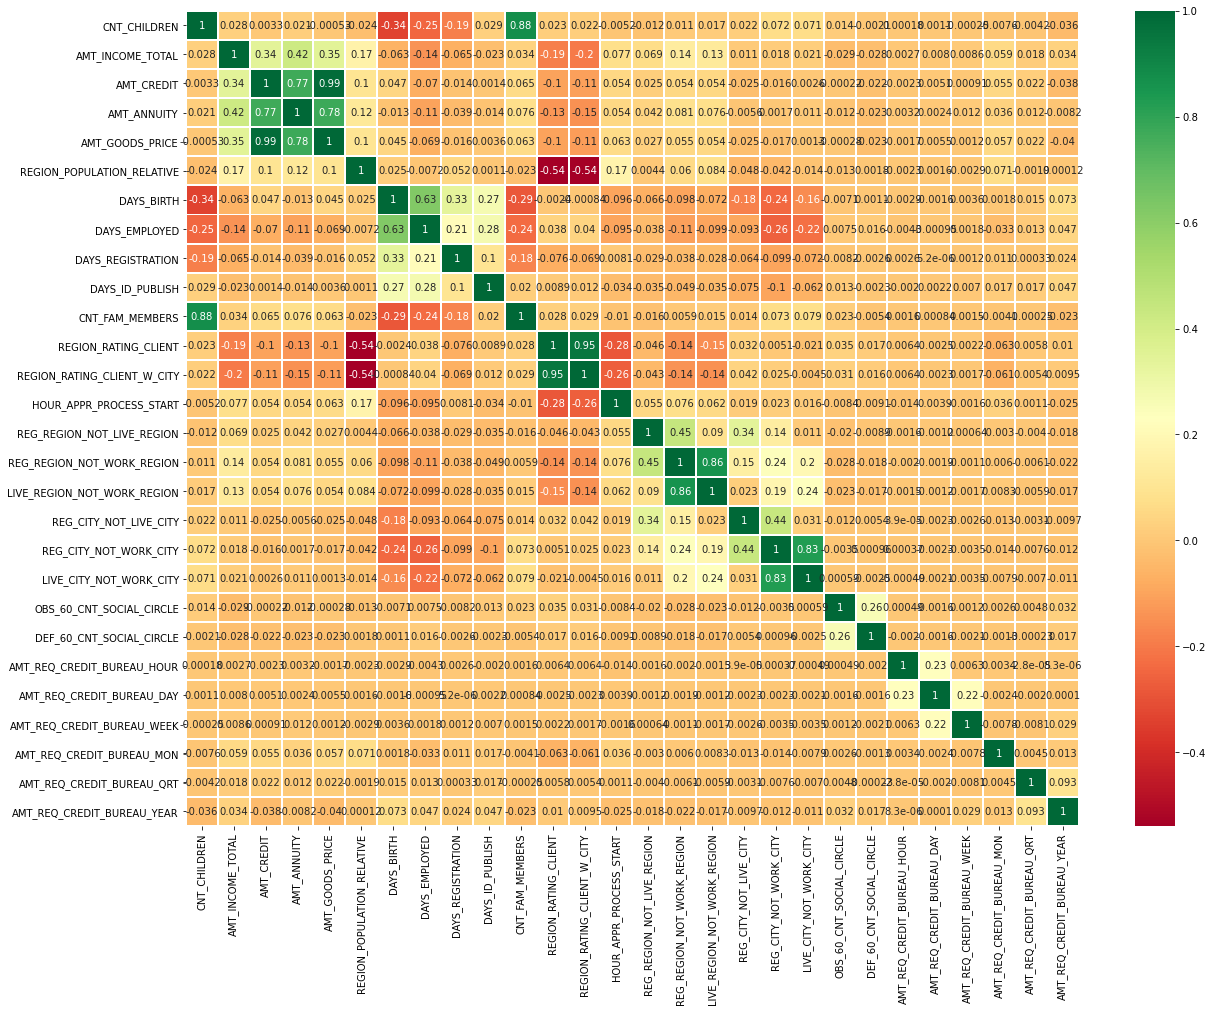

In [96]:
#plotting heatmap to see linear correlation amoung Repayers 

fig = plt.figure(figsize=(20,15))
ax = sns.heatmap(df1_repayer.corr(), cmap="RdYlGn",annot=True,linewidth =1)

1. Credit amount is highly correlated with: among  repayers

Goods Price Amount

Loan Annuity

Total Income

In [99]:
# Getting  top 10 correlation for the Defaulter  dataframe


df1_defaulter_corr=df1_defaulter.corr().where(np.triu(np.ones(df1_defaulter.corr().shape),k=1).astype(np.bool)).unstack().reset_index()
df1_defaulter_corr.columns =['VAR1','VAR2','Corr']
df1_defaulter_corr.dropna(subset = ["Corr"], inplace = True)
df1_defaulter_corr['Corr']=abs(df1_defaulter_corr['Corr'])
df1_defaulter_corr.sort_values(by='Corr',ascending=False).head(10)


,VAR1,VAR2,Corr
114,AMT_GOODS_PRICE,AMT_CREDIT,0.983103
347,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956625
280,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885506
463,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.847879
550,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.778412
115,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699
86,AMT_ANNUITY,AMT_CREDIT,0.751957
202,DAYS_EMPLOYED,DAYS_BIRTH,0.582281
434,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,0.497925
521,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,0.472241


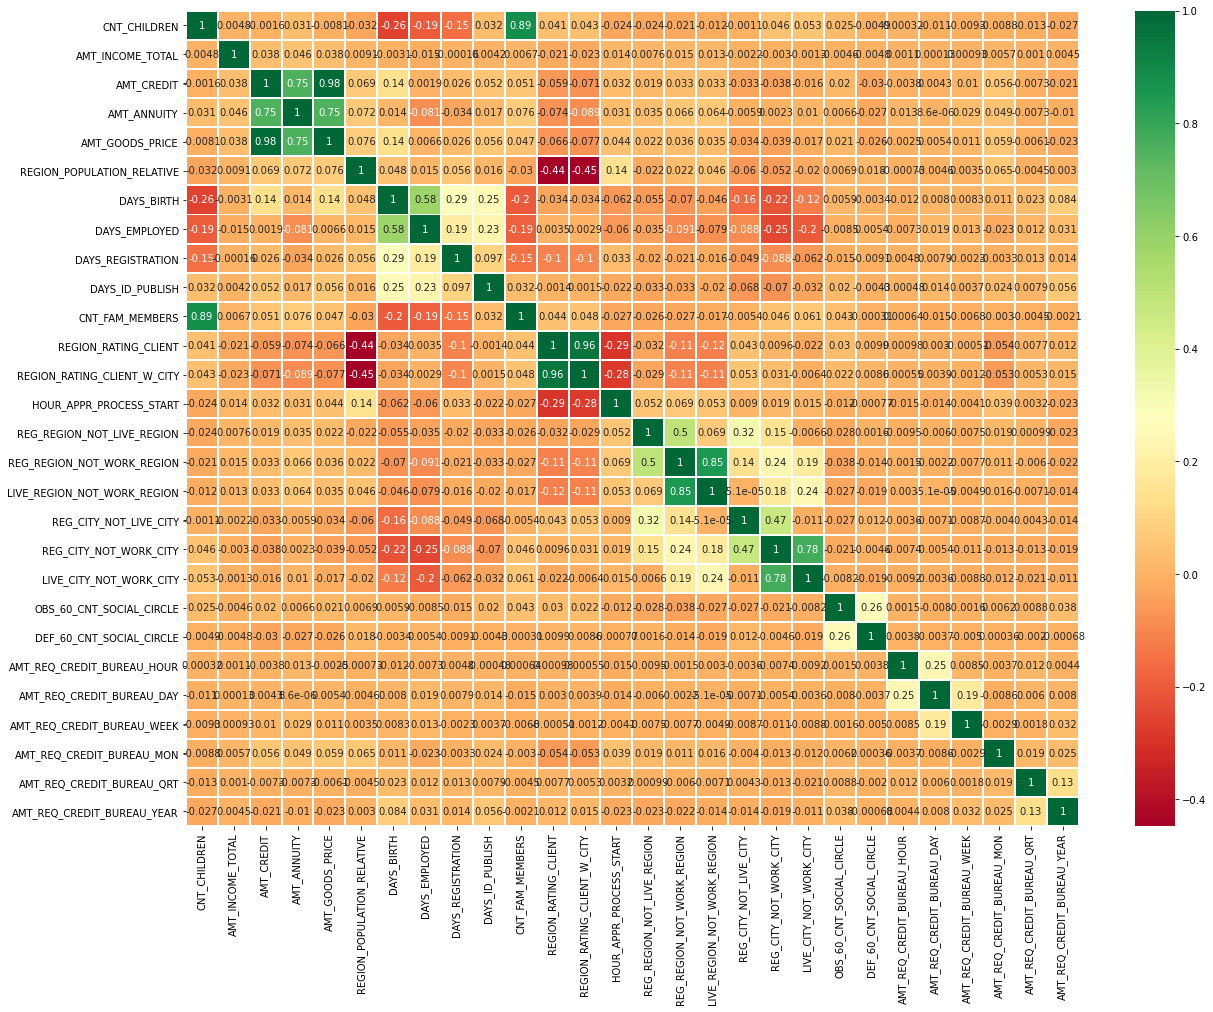

In [100]:
#plotting heatmap to see linear correlation amoung Repayers 

fig = plt.figure(figsize=(20,15))
ax = sns.heatmap(df1_defaulter.corr(), cmap="RdYlGn",annot=True,linewidth =1)

Inferences: Correlating factors amongst repayers

Credit amount is has high  correlation with good price amount which is similar as repayers. <br>
Loan annuity corr with credit amount has lightly reduced in repayers(0.77) when compared to  defaulters(0.75)<br>
We can also see that repayers have high correlation in number of days employed(0.63) when compared to defaulters(0.58).<br>
There is a severe drop in the correlation between total income of the client and the credit amount(0.038) amongst defaulters whereas it is 0.34 among repayers.

### Numerical Univariate Analysis

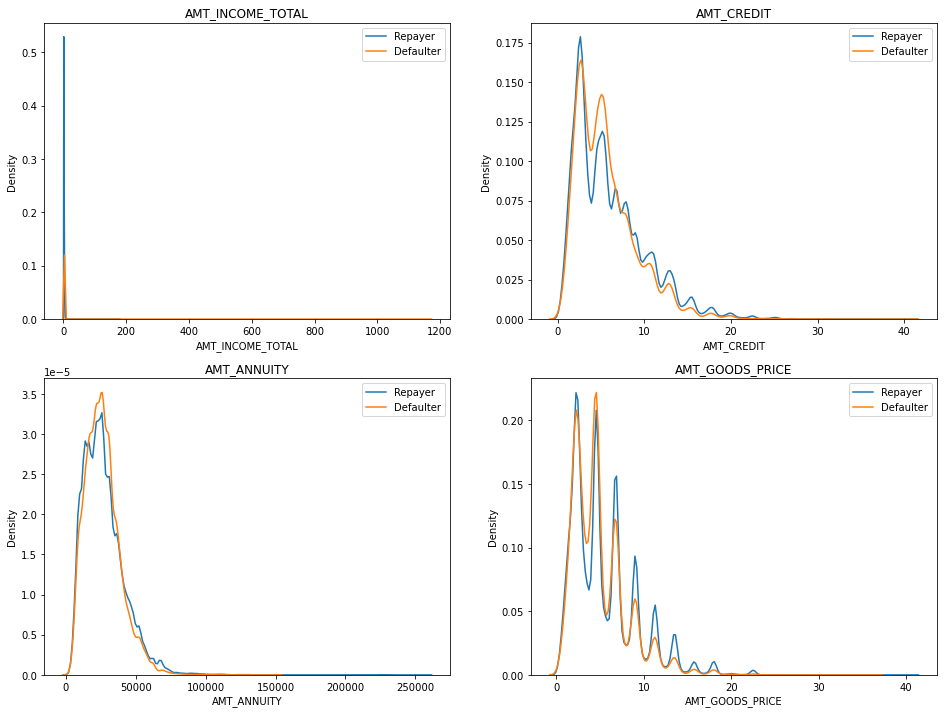

In [101]:
# Plotting the numerical columns related to amount as distribution plot to see density
amount_col = df1[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]

fig = plt.figure(figsize=(16,12))

for i in enumerate(amount_col):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(df1_repayer[i[1]], hist=False, label ="Repayer")
    sns.distplot(df1_defaulter[i[1]], hist=False,label ="Defaulter")
    plt.title(i[1])
    plt.legend()


plt.show()

Distplot are Mostly overlap , so there in no solid inferection among this varibles

In [102]:
# function for plotting repetitive rel plots in bivaritae numerical analysis

def bivar_num(x_axis,y_axis,data,hue,kind,labels):
    plt.figure(figsize=[16,16])
    sns.relplot(x=x_axis, y=y_axis, data=data, hue=hue,kind=kind,legend = False)
    plt.legend(labels=labels)
    plt.xticks(rotation=46, ha='right')
    plt.show()



<Figure size 1152x1152 with 0 Axes>

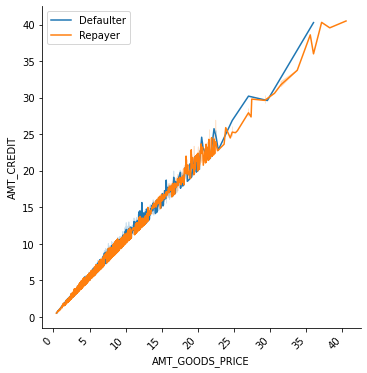

In [103]:
# Checking the relationship between Goods price and credit and comparing with loan repayment staus
bivar_num('AMT_GOODS_PRICE','AMT_CREDIT',df1,"TARGET", "line",['Defaulter','Repayer'])

There is Corr in 'AMT_GOODS_PRICE','AMT_CREDIT' till loan amt to 30l but above that There are More Defaulter

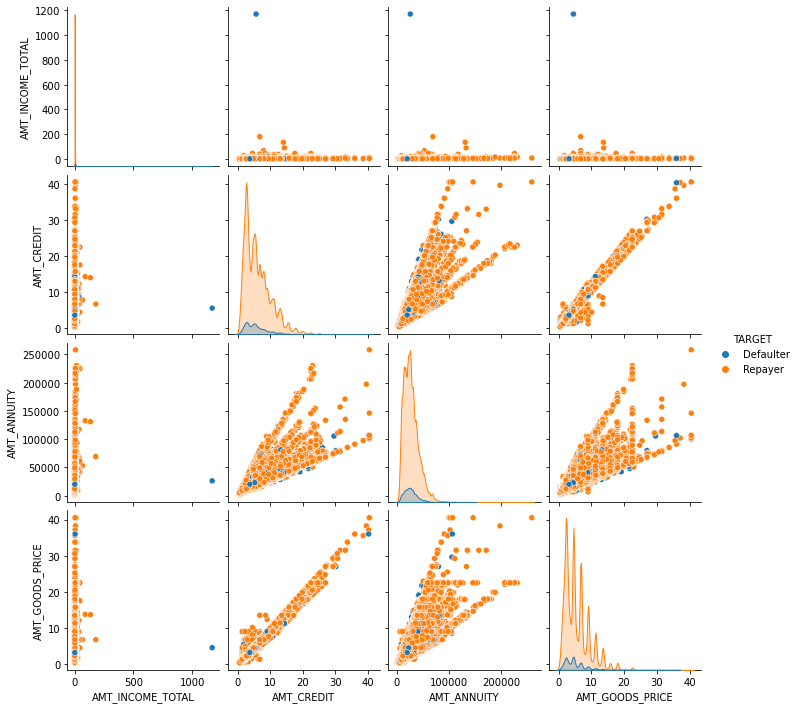

In [104]:
amount_col = df1[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
sns.pairplot(amount_col,hue='TARGET')
plt.show()

When Annuity Amount > 15K and Good Price Amount > 20 Lakhs, there is a lesser chance of defaulters<br>
There are very less defaulters for AMT_CREDIT >20 Lakhs

###  Merged Dataframes Analysis


In [105]:
all_df = pd.merge(df1, df2, how='inner', on='SK_ID_CURR')
print(all_df.shape)
all_df.head()

(1412400, 77)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AMT_GOODS_RANGE,AGE,AGE_GROUP,YEARS_EMPLOYED,EMPLOYEMENT_YEARS,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,YEARLY_DECISION
0,100002,Defaulter,Cash loans,M,0,2.025,4.065975,24700.5,3.510,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2L-3L,4L-5L,3L-4L,25.920548,25-30,1.745205,0-5,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,Others,Approved,606,XNA,XAP,Unknown,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,565.0,125.0,25.0,17.0,0.0,2
1,100003,Repayer,Cash loans,F,0,2.700,12.935025,35698.5,11.295,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2L-3L,10L Above,10L Above,45.931507,45-50,3.254795,0-5,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,Others,Approved,746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,716.0,386.0,536.0,527.0,1.0,3
2,100003,Repayer,Cash loans,F,0,2.700,12.935025,35698.5,11.295,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2L-3L,10L Above,10L Above,45.931507,45-50,3.254795,0-5,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,Others,Approved,828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,797.0,647.0,647.0,639.0,0.0,3
3,100003,Repayer,Cash loans,F,0,2.700,12.935025,35698.5,11.295,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2L-3L,10L Above,10L Above,45.931507,45-50,3.254795,0-5,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,Others,Approved,2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,2310.0,1980.0,1980.0,1976.0,1.0,7
4,100004,Repayer,Revolving loans,M,0,0.675,1.350000,6750.0,1.350,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0-1L,1L-2L,1L-2L,52.180822,50-55,0.616438,0-5,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,Others,Approved,815,Cash through the ba

In [106]:
L0 = all_df[all_df['TARGET']=='Repayer'] # Repayers
L1 = all_df[all_df['TARGET']=='Defaulter'] # Defaulters

In [107]:
#function for plotting repetitive countplots in univariate categorical analysis on the merged df

def univari_c_merged(col,data,hue,ylog,figsize):
    plt.figure(figsize=figsize)
    ax=sns.countplot(x=col, data=data,hue= hue,order=data[col].value_counts().index)
    

    if ylog:
        plt.yscale('log')
        plt.ylabel("Count (log)",fontsize=16)     
    else:
        plt.ylabel("Count",fontsize=16)       

    plt.title(col , fontsize=21) 
    plt.legend(loc = "upper right")
    plt.xticks(rotation=46, ha='right')
    
    plt.show()

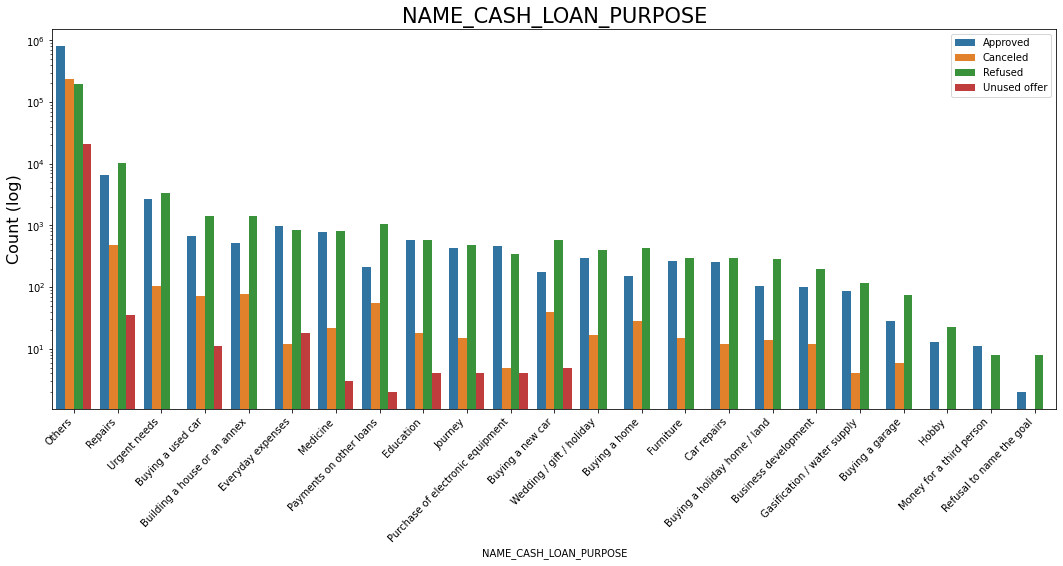

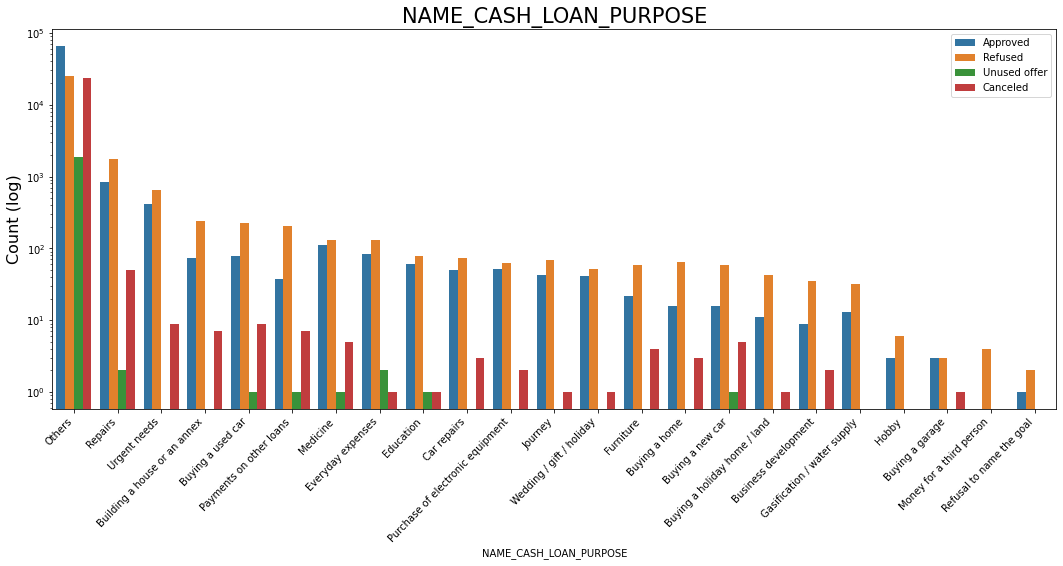

In [108]:
univari_c_merged("NAME_CASH_LOAN_PURPOSE",L0,"NAME_CONTRACT_STATUS",True,(18,7))# Repayers
univari_c_merged("NAME_CASH_LOAN_PURPOSE",L1,"NAME_CONTRACT_STATUS",True,(18,7))# Defaulters

<AxesSubplot:>

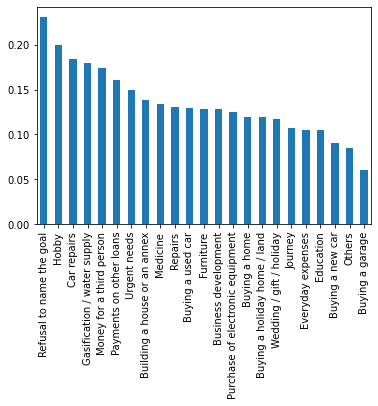

In [109]:
(all_df[all_df['TARGET']=='Defaulter']['NAME_CASH_LOAN_PURPOSE'].value_counts()/all_df['NAME_CASH_LOAN_PURPOSE'].value_counts()).sort_values(ascending=False).plot.bar()

High No of loans are seeked for repairs and they are also among high Rejection as those are considered more risky <br>
Education

In [110]:
# Function to plot point plots 

def pointplot(data,hue,x_axis,y_axis):
    plt.figure(figsize=(12,6))
    sns.pointplot(x=x_axis, y=y_axis, hue=hue, data=data)
    plt.title(x_axis+"  VS  "+y_axis,fontsize = 14)

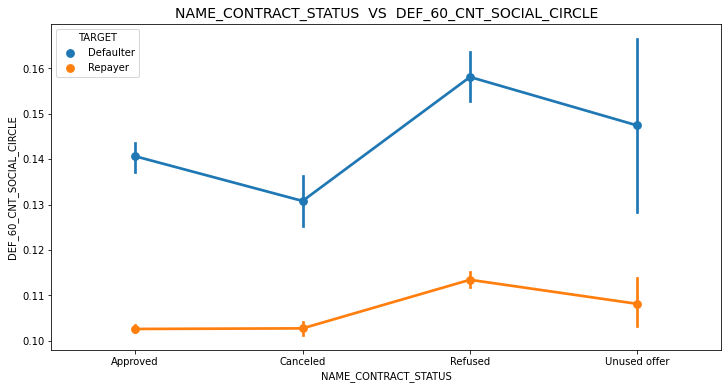

In [111]:
# plotting the relationship between people who defaulted in last 60 days being in client's social circle and contact status

pointplot(all_df,"TARGET","NAME_CONTRACT_STATUS",'DEF_60_CNT_SOCIAL_CIRCLE')

Clients who have average of 0.13 or higher their DEF_60_CNT_SOCIAL_CIRCLE score tend to default more and thus analysing client's social circle could help in disbursment of the loan.

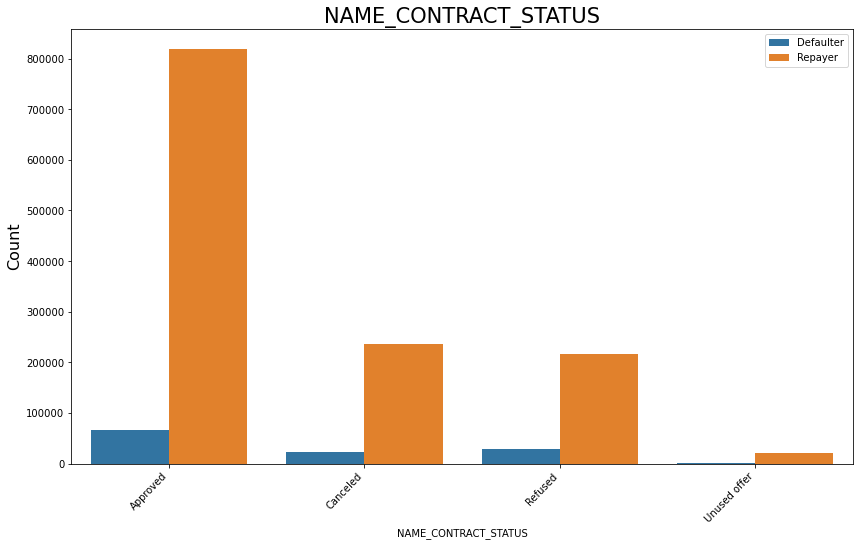

In [112]:
univari_c_merged("NAME_CONTRACT_STATUS",all_df,"TARGET",False,(14,8))

## Top Correlation For Repayment 

1. **NAME_EDUCATION_TYPE: Academic degree has less defaults.**
2. **NAME_INCOME_TYPE: Student and Businessmen have no defaults.**
3. **ORGANIZATION_TYPE: Clients from Security Ministry have Least Default rate**
4. **DAYS_BIRTH: People above age of 50 have low probability of defaulting**
5. **DAYS_EMPLOYED: Clients with 40+ year experience having less than 1% default rate**
6. **AMT_INCOME_TOTAL:Applicant with Income incres the chances of default are also less , Income above 700,000 are safest**
7. **NAME_CASH_LOAN_PURPOSE: Loans bought for Hobby, Buying garage are being repayed mostly.**
8. **CNT_CHILDREN: People with zero to two children tend to repay the loans.**

10. **CODE_GENDER: Men are at relatively higher default rate**
11. **NAME_EDUCATION_TYPE: People with Lower Secondary & Secondary education**
12. **OCCUPATION_TYPE: Avoid Low-skill Laborers, Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff as their default rate is huge.**
12. **DAYS_BIRTH: Avoid young people who are in age group of 20-40 as they have higher probability of defaulting**
13. **DAYS_EMPLOYED: People who have less than 5 years of employment have high default rate.**
14. **AMT_GOODS_PRICE: When the credit amount goes beyond 3lakhs, there is an increase in defaulters.**

# Final Suggestin
**1. Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for successful payments.**

**2. Banks should more on loans Amount 0f less than 30Lacks  as they have less Default Rate**

**3. Banks Can ignore loan application from Unemployes Clients as they have High chance of default about 40 %**

**4. People living in office apartments and  with parents has lowest default rate so Focus can be incresed there**

**5. There are very high No of clients whose Loan was Cancelled but those are among the higher repaying client**

**6. Refusal reason should be recorded for further analysis as these clients could turn into potential repaying customer.**